# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 The Home Equity (HMEQ) dataset provides valuable insights into the factors influencing loan defaults, making it an essential tool for financial institutions and researchers. This dataset includes a variety of features such as loan amount, home equity value, reason for the loan, and borrower characteristics like employment status and credit history. By analyzing these attributes, stakeholders can identify patterns and correlations that are indicative of a higher likelihood of default. For instance, attributes like high loan-to-value ratios, a higher number of derogatory reports, and low years on the job might signal increased risk. Understanding these relationships helps lenders develop more robust risk assessment models, ensuring more accurate predictions of default rates.

The ability to predict default rates using the HMEQ dataset is critical for several reasons. Firstly, it aids in credit risk management by enabling lenders to make informed decisions about approving loans and setting appropriate interest rates. Secondly, it enhances the targeting of financial products to suitable customers, reducing the risk of default and improving overall portfolio performance. Lastly, predictive models developed from this dataset can be used to comply with regulatory requirements, ensuring that lenders maintain the necessary capital reserves to cover potential losses. Overall, the HMEQ dataset serves as a fundamental resource for improving financial decision-making and maintaining the stability of lending institutions.

### **The objective:**

 The primary objective of analyzing the Home Equity (HMEQ) dataset is to understand and predict the factors that contribute to loan defaults. By examining various borrower and loan characteristics, such as credit history, loan purpose, employment status, and home equity value, analysts aim to develop predictive models that accurately identify the risk of default. This analysis helps financial institutions improve their risk assessment processes, optimize their lending strategies, and enhance decision-making to minimize financial losses. Ultimately, the goal is to create a robust framework for credit risk management that ensures both the profitability and stability of lending operations.

### **The key questions:**

To effectively utilize the Home Equity (HMEQ) dataset for understanding and predicting loan defaults, several key questions need to be addressed:

Which borrower characteristics are most strongly associated with loan defaults?

- Investigate the impact of factors like credit history, employment status, and income level on the likelihood of default.

How does the purpose of the loan (e.g., home improvement, debt consolidation) influence default rates?

- Analyze if home improvement loans are riskier than debt consolidation and more prone to defaults.

What is the role of loan amount and home equity value in predicting defaults?

- Examine the relationship between the size of the loan, the value of the collateral, and default probability.

Are there specific thresholds or patterns in borrower behavior that predict defaults?

- Identify if there are critical thresholds (e.g., debt-to-income ratio, number of derogatory reports) beyond which the risk of default significantly increases.

What are the temporal aspects of defaults, such as the time since the loan was issued or the borrower's job tenure?

- Determine how time-related factors like the age of the loan or the number of years on the job affect default risk.

If possible in the future, how do external economic conditions or demographic factors correlate with loan defaults?

- Explore if broader economic indicators or demographic data can be integrated to enhance the predictive accuracy of default models.

What is the accuracy and reliability of predictive models developed using this dataset?

- Assess the performance of various statistical and machine learning models in predicting loan defaults and ensure they are robust and generalizable.

By addressing these questions, stakeholders can gain comprehensive insights into the determinants of loan defaults, enabling them to refine their risk management strategies and make data-driven decisions.

### **The problem formulation**:

The primary problem we aim to solve with the Home Equity (HMEQ) dataset is to accurately identify and predict the factors that lead to loan defaults. Financial institutions need robust risk assessment tools to minimize the incidence of defaults, which can lead to significant financial losses and instability. By analyzing borrower characteristics, loan details, and other relevant factors, we seek to develop predictive models that can reliably forecast default probabilities. This will enable lenders to make more informed lending decisions, set appropriate interest rates, and implement targeted risk mitigation strategies, ultimately enhancing the overall health and profitability of their loan portfolios.

## **Data Description**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
# set the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

# For multivariate PCA analysis
from sklearn.decomposition import PCA

# To encode categorical variables and scale data for PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To check model performance
from sklearn.metrics import (
    auc,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# used for stats functions like zscore
from scipy import stats
from scipy.stats import uniform

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K

import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
# Read the loan dataset file
data = pd.read_csv("/content/hmeq.csv")

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [ ]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.00000,39025.00000,HomeImp,Other,10.50000,0.00000,0.00000,94.36667,1.00000,9.00000,NaN
1,1,1300,70053.00000,68400.00000,HomeImp,Other,7.00000,0.00000,2.00000,121.83333,0.00000,14.00000,NaN
2,1,1500,13500.00000,16700.00000,HomeImp,Other,4.00000,0.00000,0.00000,149.46667,1.00000,10.00000,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.00000,112000.00000,HomeImp,Office,3.00000,0.00000,0.00000,93.33333,0.00000,14.00000,NaN


**Observations**
- The main things to note with this peak at the data is that there is a row at index 3 that is missing most of its data and all the debt to income fields are missing for these rows. This suggests there is going to be missing data that will need to be adjudicated.

In [ ]:
data.shape

(5960, 13)

**Observations**
- The original dataset has 5960 rows and 13 features.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observations**
- Most of the features are float, and there are really 3 categorical columns that include REASON, JOB, and BAD.
- Many rows have missing values that will need to be adjudicated, with DEBTINC being the worst offender. Unfortunately, since income is not provided, this is the only way to determine the level of affordability for the loan so this must be fixed.

In [ ]:
data.duplicated().sum()

0

**Observation**
- No duplicated rows were detected in the data.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.00000,0.19950,0.39966,0.00000,0.00000,0.00000,0.00000,1.00000
LOAN,5960.00000,18607.96980,11207.48042,1100.00000,11100.00000,16300.00000,23300.00000,89900.00000
MORTDUE,5442.00000,73760.81720,44457.60946,2063.00000,46276.00000,65019.00000,91488.00000,399550.00000
VALUE,5848.00000,101776.04874,57385.77533,8000.00000,66075.50000,89235.50000,119824.25000,855909.00000
YOJ,5445.00000,8.92227,7.57398,0.00000,3.00000,7.00000,13.00000,41.00000
DEROG,5252.00000,0.25457,0.84605,0.00000,0.00000,0.00000,0.00000,10.00000
DELINQ,5380.00000,0.44944,1.12727,0.00000,0.00000,0.00000,0.00000,15.00000
CLAGE,5652.00000,179.76628,85.81009,0.00000,115.11670,173.46667,231.56228,1168.23356
NINQ,5450.00000,1.18606,1.72867,0.00000,0.00000,1.00000,2.00000,17.00000
CLNO,5738.00000,21.29610,10.13893,0.00000,15.00000,20.00000,26.00000,71.00000


**Observations**

1. BAD:

- Mean: The average value is 0.199, indicating that about 19.9% of the loans are in default.
- Min/Max: The values range from 0 to 1, confirming that it is a binary variable.

2. LOAN:

- Mean: The average loan amount is approximately 18608.
- Min/Max: The loan amounts range from 1100 to 89900, showing a wide range of loan sizes.
- Std Dev: A high standard deviation (11207) indicates significant variability in loan amounts.

3. MORTDUE:

- Mean: The average mortgage due is around 73761.
- Min/Max: Values range from 0 (or missing values) to 399550, with missing values possibly included in the descriptive statistics.
- Std Dev: The standard deviation is 44458, showing substantial variation in mortgage dues.

4. VALUE:

- Mean: The average home value is approximately 101776.
- Min/Max: Home values range from 8000 to 855909.
- Std Dev: A high standard deviation (57386) suggests diverse property values.

5. YOJ (Years on Job):

- Mean: The average years on the job is around 8.92.
- Min/Max: This ranges from 0 to 41, indicating various employment tenures.
- Std Dev: The standard deviation of 7.57 reflects significant variation in job tenure among borrowers.

6. DEROG:

- Mean: The average number of derogatory reports is 0.25.
- Min/Max: Values range from 0 to 10.
- Std Dev: A standard deviation of 0.85 suggests that most borrowers have few derogatory reports, but a small number have significantly more.

7. DELINQ:

- Mean: The average number of delinquent credit lines is 0.45.
- Min/Max: This ranges from 0 to 15.
- Std Dev: A standard deviation of 1.13 indicates a small subset of borrowers with high delinquency counts.

8. CLAGE (Age of Oldest Credit Line):

- Mean: The average age is around 180 months (approximately 15 years).
- Min/Max: Ranges from 0 to 1168 months, showing wide variation.
- Std Dev: A high standard deviation (86) reflects diverse credit histories.

9. NINQ (Number of Inquiries):

- Mean: The average number of recent credit inquiries is 1.19.
- Min/Max: Values range from 0 to 17.
- Std Dev: The standard deviation of 1.73 indicates variability in recent credit activity.

10. CLNO (Number of Credit Lines):

- Mean: The average number of credit lines is 21.3.
- Min/Max: This ranges from 0 to 71.
- Std Dev: A standard deviation of 10.14 shows considerable diversity in the number of credit lines among borrowers.

11. DEBTINC (Debt-to-Income Ratio):

- Mean: The average debt-to-income ratio is around 33.78%.
- Min/Max: Values range from 0.52 to 203.
- Std Dev: A standard deviation of 8.6 suggests a reasonable distribution.

**Summary**

These statistics provide a broad overview of the dataset, highlighting the diversity and variability in borrower profiles and loan characteristics. High standard deviations in many features suggest significant differences among borrowers, which could be important for modeling and risk assessment. The binary nature of the BAD variable indicates its suitability as a target variable for predictive modeling of loan defaults.

In [ ]:
# List of all the categorical variables
categorical_cols = ["REASON", "JOB"]
for col in categorical_cols:
  print(data[col].value_counts(1))
  print("-" * 50)

REASON
DebtCon   0.68816
HomeImp   0.31184
Name: proportion, dtype: float64
--------------------------------------------------
JOB
Other     0.42035
ProfExe   0.22461
Office    0.16687
Mgr       0.13501
Self      0.03397
Sales     0.01919
Name: proportion, dtype: float64
--------------------------------------------------


**Observations**
- The REASON column contains two values, HomeImp and DebtCon, with approximately 69% in debt consolidation and 31% in home improvement which speaks to the majority use case for these home equity loans.
- The JOB columnn contains 6 categorical types, including Other, ProfExe (Professional Executive?), Office (clerical office worker?), Mgr (any kind of manager?), Self (self employed), Sales (salesperson). The vast majority (42%) are marked as other, which doesn't give us much information.
- Overall the JOB column has a lot of questions so assumptions will need to be made in order to gleen info from this feature.

###**Clean Missing Data**

In [ ]:
# Step 1: Initial Assessment if missing vals
missing_values = data.isnull().sum()
print('-'*50)
print("Missing values in each column:\n", missing_values)

# Step 2: Handling Missing Values

# Dropping rows with excessive missing data (more than half the columns missing)
threshold = len(data.columns) // 2
rows_before = data.index
data = data.dropna(thresh=threshold)
rows_after = data.index

# Printing the total number of dropped rows
dropped_rows = rows_before.shape[0] - rows_after.shape[0]
print('-'*50)
print("Number of dropped rows:\n", dropped_rows)

# Imputing missing values for numerical columns with median
numerical_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
for col in numerical_columns:
  data[col].fillna(data[col].median(), inplace=True)

# Imputing missing values for categorical columns with 'Unknown'
categorical_columns = ['REASON', 'JOB']
for col in categorical_columns:
  if col == 'REASON':
    data[col].fillna('Unknown', inplace=True)
  else:
    # just lump unknowns into the Other category since this is essentially unknown as well
    data[col].fillna('Other', inplace=True)

# Step 3: Verify and Adjust

# Check the cleaned data
print('-'*50)
print("Missing values after cleaning:\n", data.isnull().sum())

# Reset index
data.reset_index(drop=True, inplace=True)

--------------------------------------------------
Missing values in each column:
 BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64
--------------------------------------------------
Number of dropped rows:
 101
--------------------------------------------------
Missing values after cleaning:
 BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5859 non-null   int64  
 1   LOAN     5859 non-null   int64  
 2   MORTDUE  5859 non-null   float64
 3   VALUE    5859 non-null   float64
 4   REASON   5859 non-null   object 
 5   JOB      5859 non-null   object 
 6   YOJ      5859 non-null   float64
 7   DEROG    5859 non-null   float64
 8   DELINQ   5859 non-null   float64
 9   CLAGE    5859 non-null   float64
 10  NINQ     5859 non-null   float64
 11  CLNO     5859 non-null   float64
 12  DEBTINC  5859 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 595.2+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5859.00000,0.20055,0.40044,0.00000,0.00000,0.00000,0.00000,1.00000
LOAN,5859.00000,18710.22359,11243.65651,1100.00000,11100.00000,16400.00000,23450.00000,89900.00000
MORTDUE,5859.00000,73221.11046,42824.53653,2063.00000,48041.00000,65062.00000,88903.50000,399550.00000
VALUE,5859.00000,101870.71114,57123.19318,8000.00000,66541.00000,89609.00000,119161.50000,855909.00000
YOJ,5859.00000,8.78478,7.31433,0.00000,3.00000,7.00000,12.00000,41.00000
DEROG,5859.00000,0.22820,0.80476,0.00000,0.00000,0.00000,0.00000,10.00000
DELINQ,5859.00000,0.41270,1.08719,0.00000,0.00000,0.00000,0.00000,15.00000
CLAGE,5859.00000,179.54371,84.28838,0.00000,116.74327,173.46667,228.40936,1168.23356
NINQ,5859.00000,1.17307,1.66791,0.00000,0.00000,1.00000,2.00000,17.00000
CLNO,5859.00000,21.26933,10.03537,0.00000,15.00000,20.00000,26.00000,71.00000


**Observations**
- The statistics only changed slightly after cleaning up the data. Now we can adequately apply EDA and modeling techniques.

###**Categorize Classifier Columns**

In [ ]:
# convert object columns and BAD to categorical to save space and simplify processing
# Identify object columns
columns = data.select_dtypes(include=['object']).columns.to_list()
columns.append('BAD')

# Convert object columns to categorical
for col in columns:
    data[col] = data[col].astype('category')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5859 non-null   category
 1   LOAN     5859 non-null   int64   
 2   MORTDUE  5859 non-null   float64 
 3   VALUE    5859 non-null   float64 
 4   REASON   5859 non-null   category
 5   JOB      5859 non-null   category
 6   YOJ      5859 non-null   float64 
 7   DEROG    5859 non-null   float64 
 8   DELINQ   5859 non-null   float64 
 9   CLAGE    5859 non-null   float64 
 10  NINQ     5859 non-null   float64 
 11  CLNO     5859 non-null   float64 
 12  DEBTINC  5859 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 475.5 KB
None


In [ ]:
data.duplicated().sum()

0

**Observations**
- BAD, REASON, and JOB are now categorical columns and will be easier to work with when analyzing.
- Still no duplicates found across the data after cleaning.

## Summary Statistics

- After analyzing the data distribution for each column and fixing the features that were missing we have the same number of non-null rows for each column, no duplicates, reasonable distributions, and categorical columns for REASON, JOB, and BAD. We are now ready to perform EDA to dive into the relationships in the data that will have the greatest impact on defaults.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

In [ ]:
def create_countplot(df, column_name):
    """
    Calculate the counts and percentages of each unique value in a specified column,
    and sort the results by ascending counts.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column to analyze.

    Returns:
    pd.DataFrame: A DataFrame containing the counts and percentages of each unique value in the specified column,
                  sorted by ascending counts.
    """
    plt.figure(figsize=(12, 7))
    sns.countplot(x=column_name, data=df)
    plt.show()

In [ ]:
def calculate_and_sort_counts_percentages(df, column_name):
  """
  Calculate the counts and percentages of each unique value in a specified column,
  and sort the results by ascending counts.

  Parameters:
  df (pd.DataFrame): The input DataFrame.
  column_name (str): The name of the column to analyze.

  Returns:
  pd.DataFrame: A DataFrame containing the counts and percentages of each unique value in the specified column,
                sorted by ascending counts.
  """
  # Calculate the counts and percentages of each value in the specified column
  value_counts = df[column_name].value_counts()
  value_percentages = df[column_name].value_counts(normalize=True) * 100

  # Combine counts and percentages into a single DataFrame
  summary = pd.DataFrame({
      'Count': value_counts,
      'Percentage': value_percentages
  }).reset_index()

  # Rename columns for better readability
  summary.columns = [column_name, 'Count', 'Percentage']

  # Sort the DataFrame by ascending counts
  summary_sorted = summary.sort_values(by='Count', ascending=False)

  return summary_sorted

####**Range of Loans**

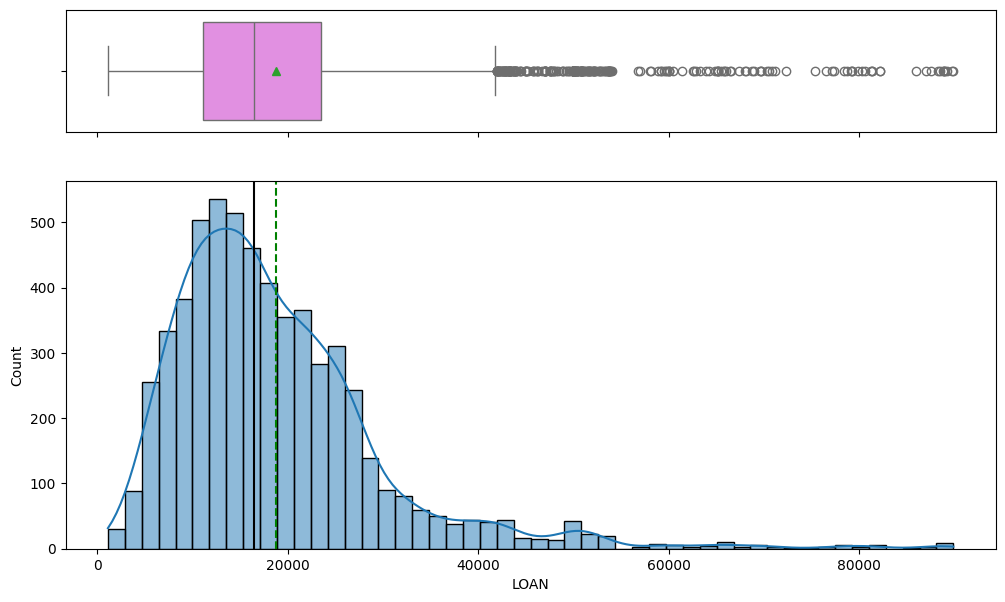

In [ ]:
histogram_boxplot(data, "LOAN", kde=True, bins = 50)

**Observations**
- The distribution is right skewed
- The mean is slightly greater than the median
- There are a large number of outliers at the top end of the range. We will analyze this further to determine if we need to treat these to prevent bias in the predictions.

####**Range of Outstanding Mortgages**

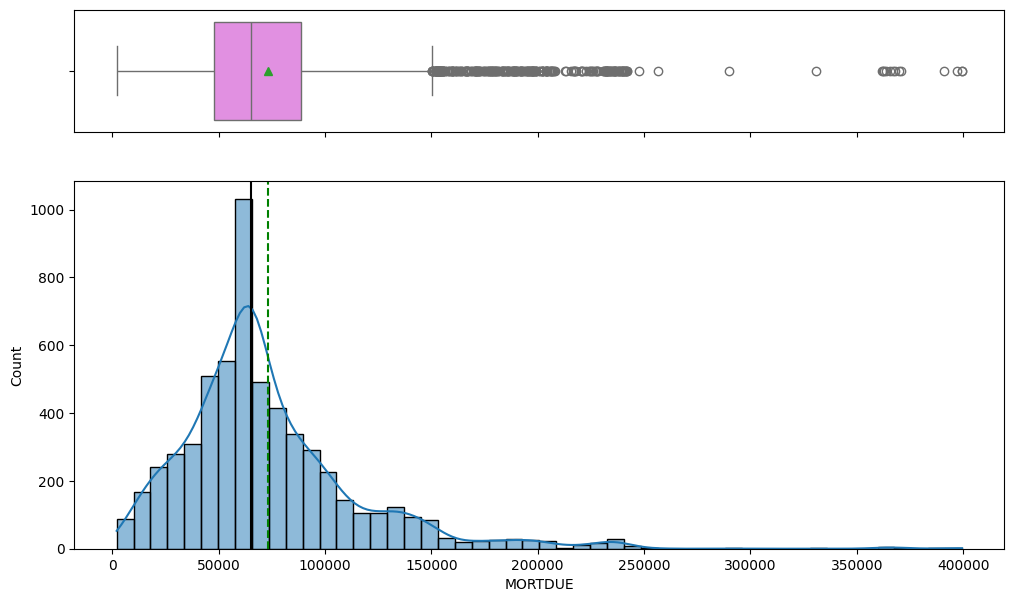

In [ ]:
histogram_boxplot(data, "MORTDUE", kde=True, bins = 50)

**Observations**
- The distribution is right skewed
- The mean is slightly greater than the median
- There are a large number of outliers at the top end of the range. We will analyze this further to determine if we need to treat these to prevent bias in the predictions.

####**Value of Current Property**

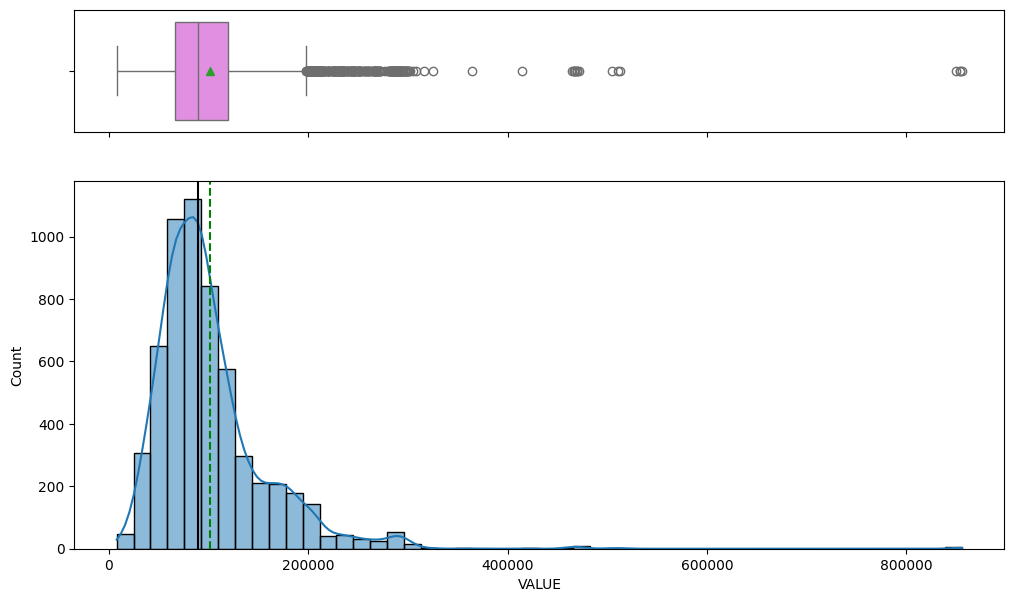

In [ ]:
histogram_boxplot(data, "VALUE", kde=True, bins = 50)

**Observations**
- The distribution is right skewed
- The mean is slightly greater than the median
- There are a large number of outliers at the top end of the range. We will analyze this further to determine if we need to treat these to prevent bias in the predictions.

####**Reason for Loan**

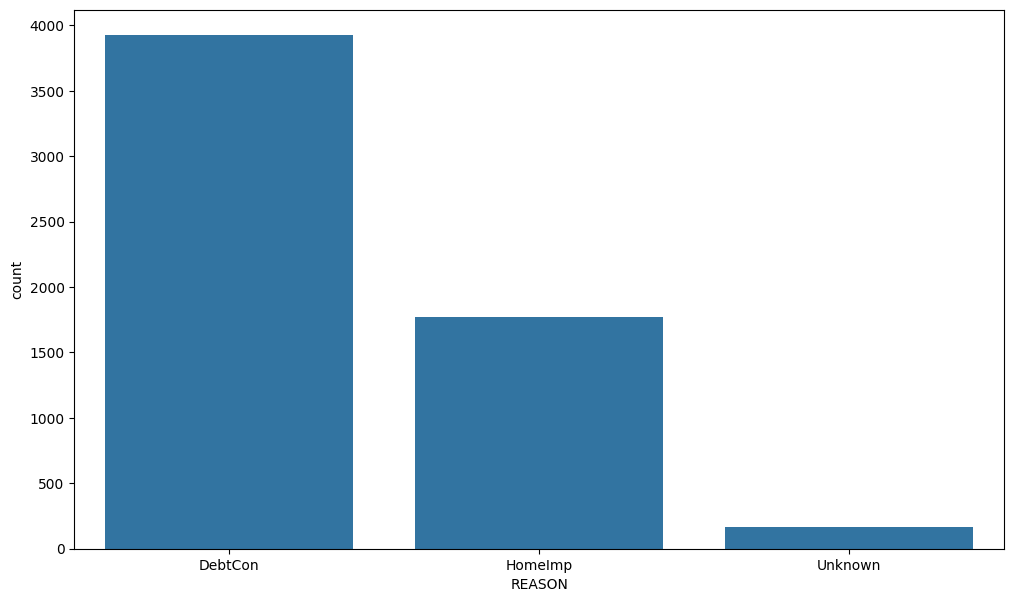

In [ ]:
create_countplot(data, 'REASON')

**Observations**
- The vast majority (nearly 4000) of the loans were attributed to debt consolidation.
- Nearly 2000 loans were for home improvement purposes.
- A couple hundred had missing reasons, so it was imputed that they were unknown.

####**Job Types**

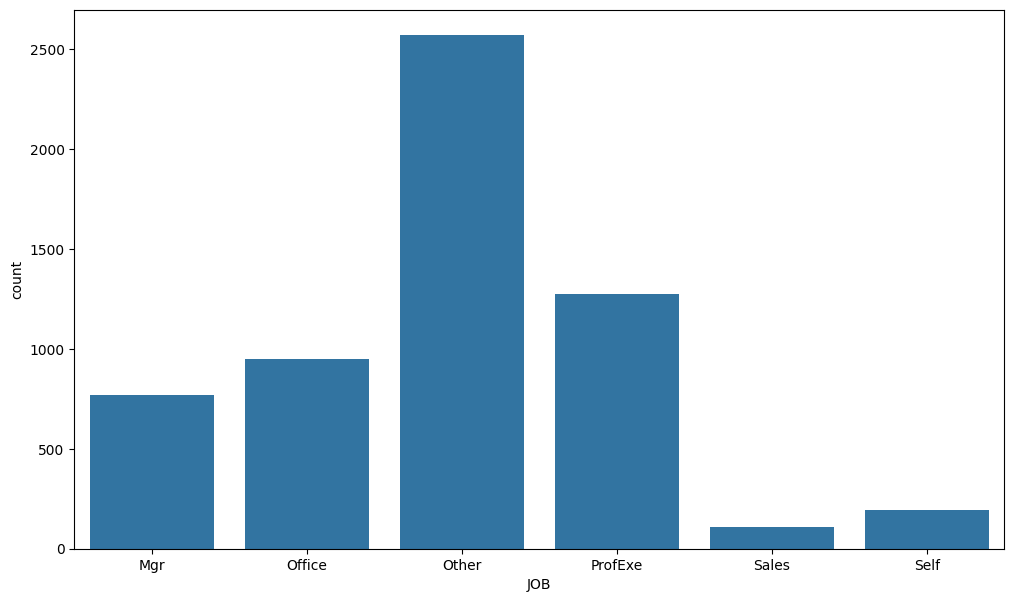

In [ ]:
create_countplot(data, 'JOB')

**Observations**
- The job type feature is problematic because there are only 6 types, and they are very loose definitions. For instance, it's not clear what industry the managers are in and the income and economic status can vary greatly. The same can be said for most of the other categories.
- Other has the highest count, and is also the most unknown, so we'll take this column with a grain of salt.
- Note that we lumped missing values with Other since there weren't a lot of them and essentially Other is unknown anyway

####**Years at Job**

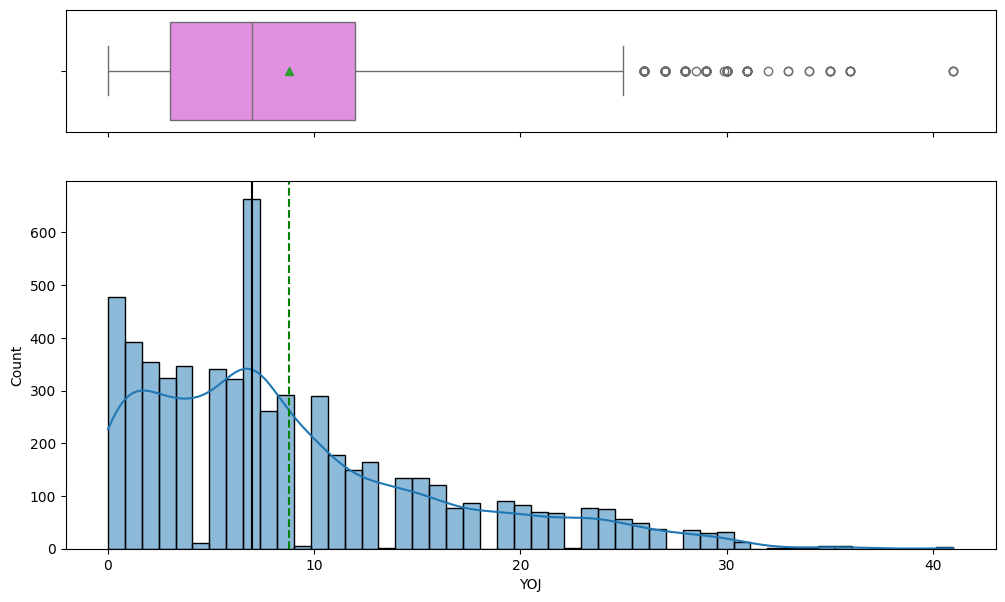

In [ ]:
histogram_boxplot(data, "YOJ", kde=True, bins = 50)

**Observations**
- The distribution is right skewed, which is understandable due to the length of time people typically stay at a job.
- There is a spike at the median at around 8 years, and the mean is not too much greater at around 9 years.
- There is a significant number of outliers at the top of the range again which may need to be analyzed further if it adds too much bias.

####**Number of Derogatory Credit Reports**

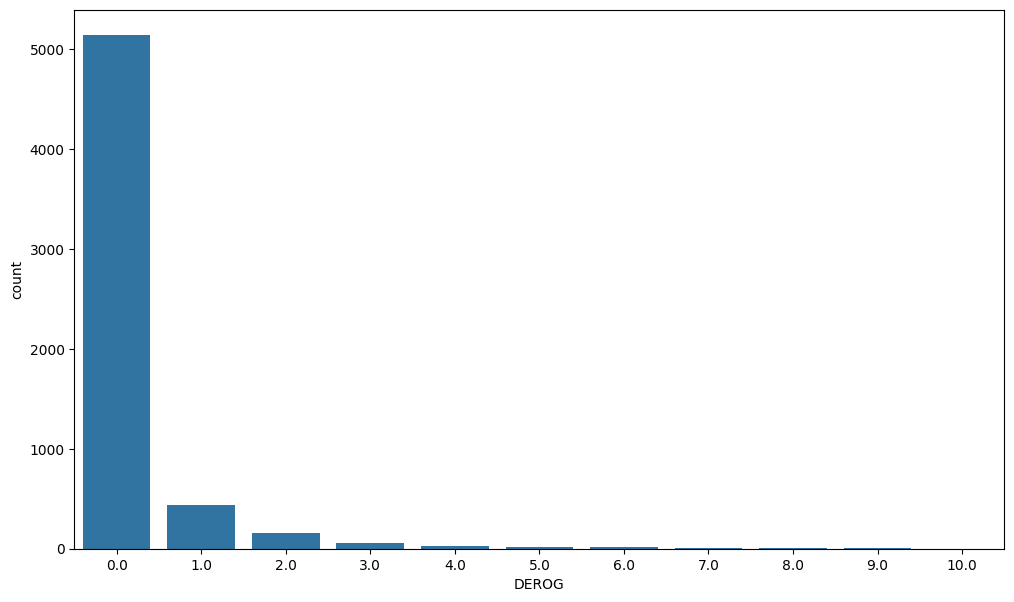

In [ ]:
create_countplot(data, 'DEROG')

In [ ]:
calculate_and_sort_counts_percentages(data, 'DEROG')

,DEROG,Count,Percentage
0,0.00000,5134,87.62587
1,1.00000,435,7.42448
2,2.00000,160,2.73084
3,3.00000,58,0.98993
4,4.00000,23,0.39256
5,5.00000,15,0.25602
6,6.00000,15,0.25602
7,7.00000,8,0.13654
8,8.00000,6,0.10241
9,9.00000,3,0.05120


**Observations**
- The vast majority of loans have no derogatory reports.
- As expected, the derog numbers drop considerably greater than 0 with only 2 loans with 10.

####**Number of Delinquent Credit Lines**

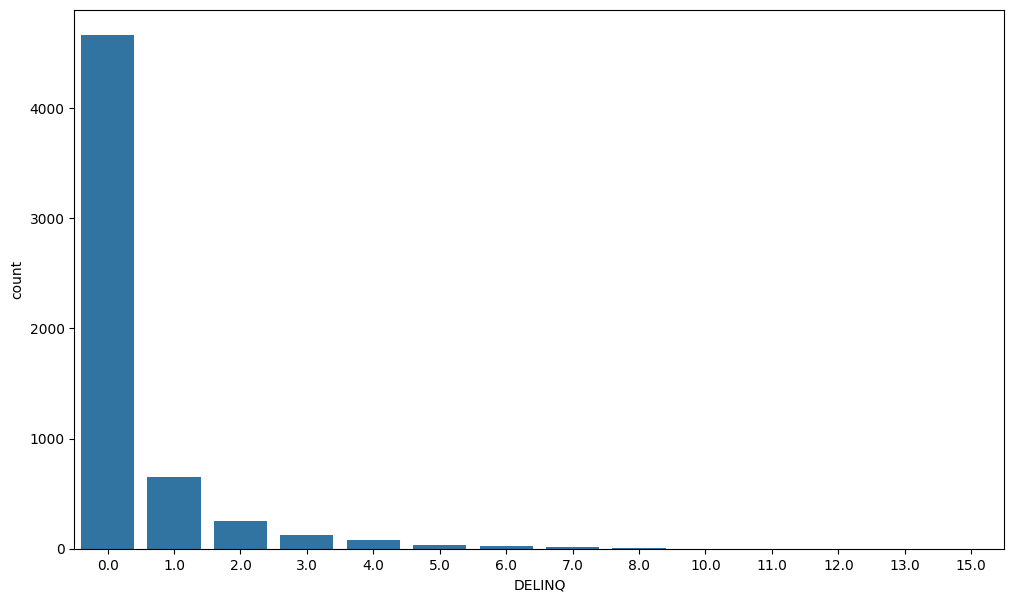

In [ ]:
create_countplot(data, 'DELINQ')

In [ ]:
calculate_and_sort_counts_percentages(data, 'DELINQ')

,DELINQ,Count,Percentage
0,0.00000,4658,79.50162
1,1.00000,654,11.16231
2,2.00000,250,4.26694
3,3.00000,129,2.20174
4,4.00000,78,1.33129
5,5.00000,38,0.64857
6,6.00000,27,0.46083
7,7.00000,13,0.22188
8,8.00000,5,0.08534
9,10.00000,2,0.03414


**Observations**
- Similar to the derog distribution, the delinquent distribution overwhelmingly has no delinquencies.
- The numbers drop off significantly after 0, with 12, 13, and 15 with only 1 occurence.

####**Oldest Credit Line Age**

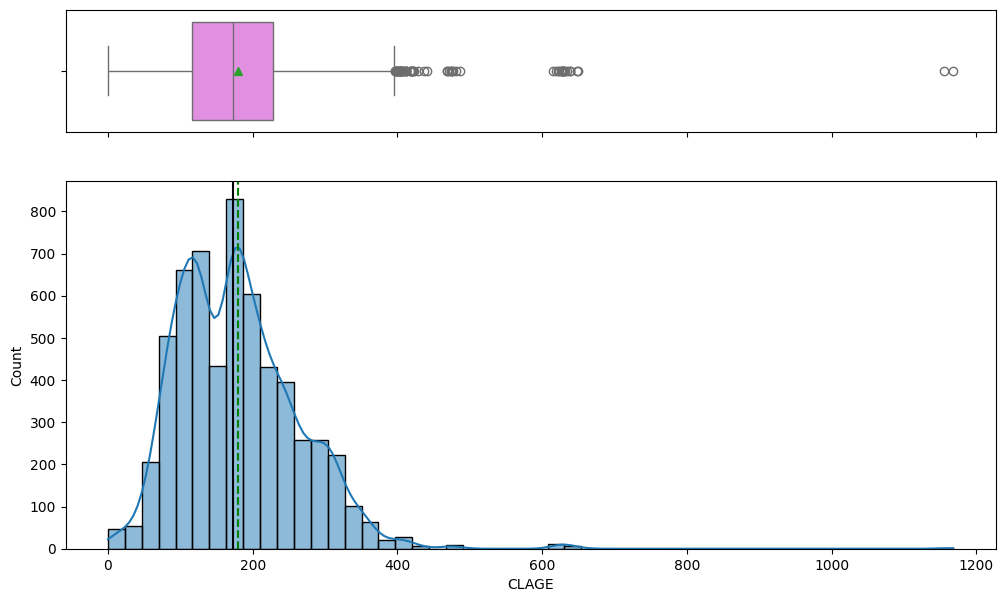

In [ ]:
histogram_boxplot(data, "CLAGE", kde=True, bins = 50)

**Observations**
- The oldest credit line age is a normal distribution that is right skewed.
- The median, mean, and peak are very close to each other and is slightly below 200 months (~16 years) signifying that people are hanging onto their lines for a long time before paying them off.
- A large number of outliers exist on the upper end of the range.

####**Number of Recent Credit Inquiries**

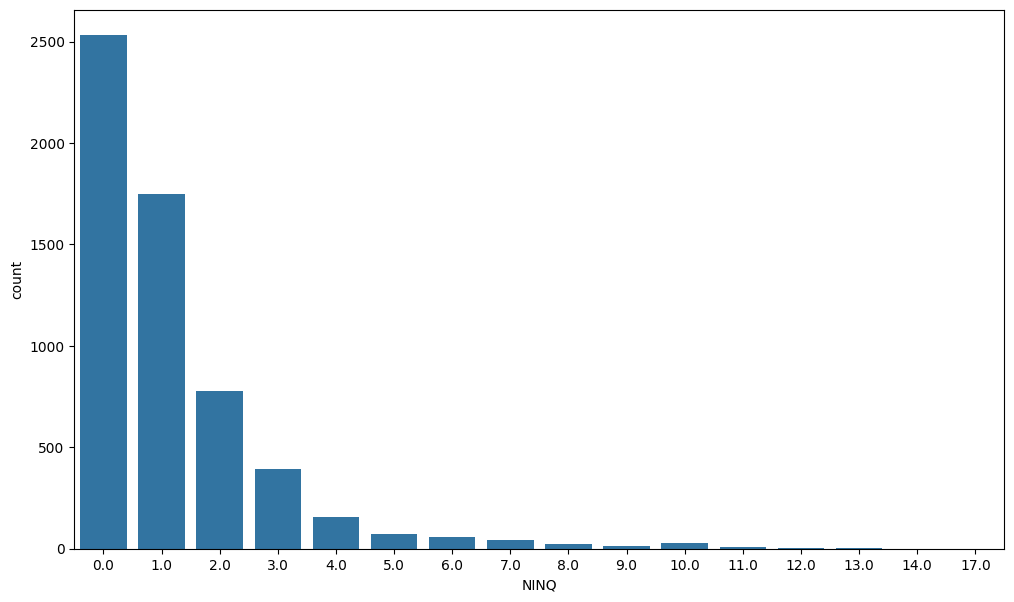

In [ ]:
create_countplot(data, 'NINQ')

In [ ]:
calculate_and_sort_counts_percentages(data, 'NINQ')

,NINQ,Count,Percentage
0,0.00000,2531,43.19850
1,1.00000,1748,29.83444
2,2.00000,780,13.31285
3,3.00000,392,6.69056
4,4.00000,156,2.66257
5,5.00000,75,1.28008
6,6.00000,56,0.95579
7,7.00000,44,0.75098
8,10.00000,28,0.47790
9,8.00000,22,0.37549


**Observations**
- The largest proporation of borrowers have 0 inquiries, but the percentage is quite a bit lower than the previous few derog reports which still makes sense considering that a lot of times this just indicates shopping and not necessarily buying.
- The distribution expectedly tails off quickly after 0.
- The highest number of inquiries is 14 and 17, with only 1 instance of each.

####**Number of Existing Credit Lines**

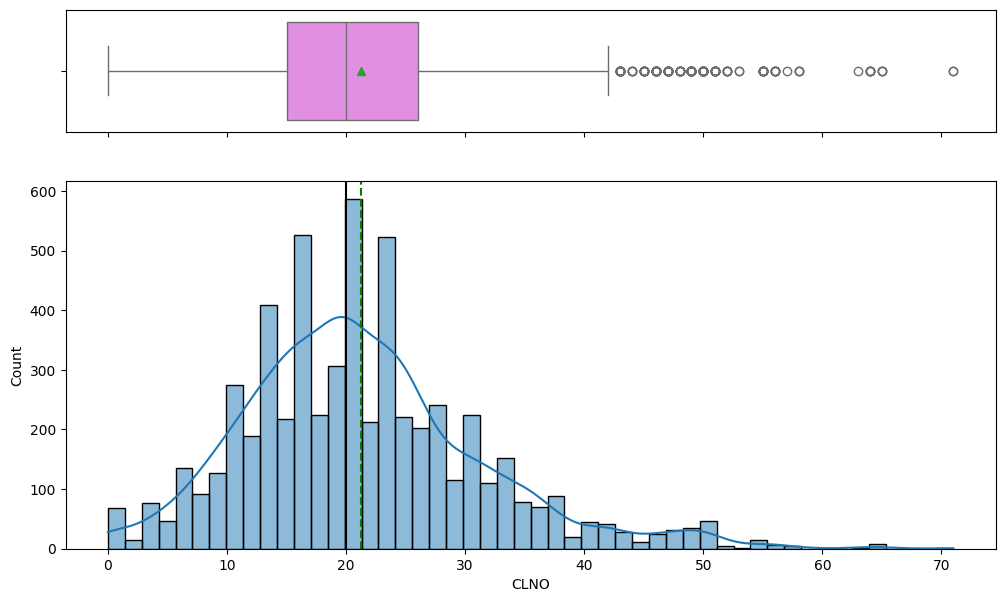

In [ ]:
histogram_boxplot(data, "CLNO", kde=True, bins = 50)

**Observations**
- The number of existing credit lines is a normal distribution with a right skew.
- There are a number of outliers at the top of the range.
- The mean and median are very close and land on the peak of about 20 credit lines.
- The mean number of credit lines seems high, this feature is worth analyzing as it likes has high correlation to defaults.

####**Debt to Income Ratio**

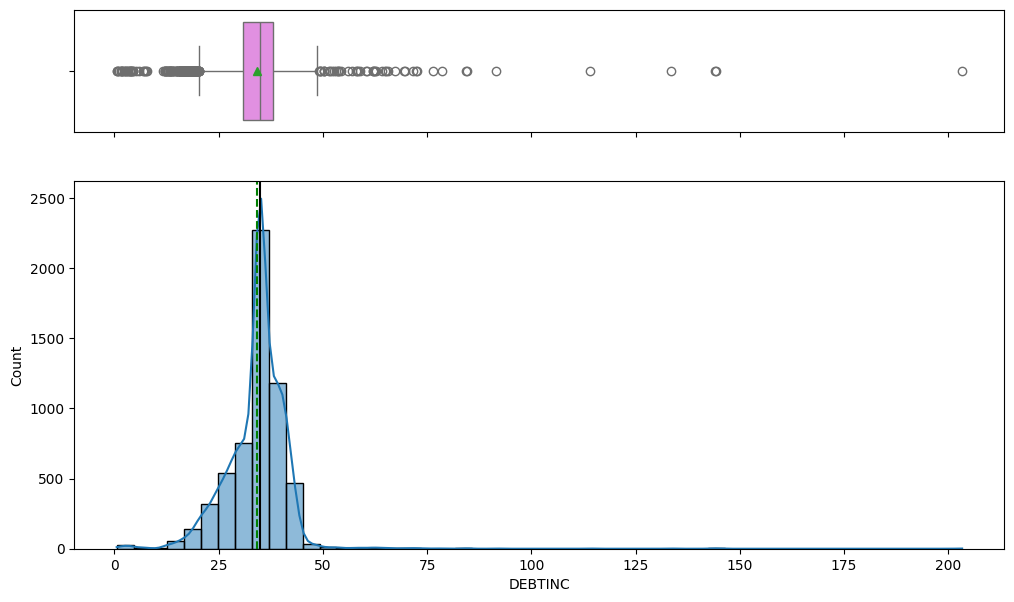

In [ ]:
histogram_boxplot(data, "DEBTINC", kde=True, bins = 50)

**Observations**
- The debt-to-income distribution is in a tight range but still seems normal with a right skew.
- There are a larger number of outliers on both the top and bottom of the range.

### **Bivariate Analysis**

In [ ]:
def stacked_barplot(data, predictor):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    # Get the counts of target categories for each predictor category
    counts = data.groupby([predictor, 'BAD']).size().unstack(fill_value=0)

    # Calculate the proportions
    proportions = counts.div(counts.sum(axis=1), axis=0)

    # Reverse the order of columns to have defaults on the bottom
    proportions = proportions[[1, 0]]

    # Rename the columns
    proportions.columns = ['Default', 'Paid']

    # Plot stacked bar chart
    proportions.plot(kind='bar', stacked=True, figsize=(10, 7))

    # Add labels and title
    plt.xlabel(predictor)
    plt.ylabel('Default Rate')
    plt.title(f'Stacked Bar Plot of {predictor} to Default Rate')
    plt.legend(title='Default Rate', loc="upper left", bbox_to_anchor=(1, 1))

    # Show the plot
    plt.show()

In [ ]:
def bivariate_box_plot(data, predictor):
  plt.figure(figsize=(10, 7))
  sns.boxplot(x='BAD', y=predictor, data=data)
  plt.title(f'Box Plot of Loan Default to {predictor}')
  plt.xlabel('Loan Default')
  plt.ylabel(f'{predictor}')

  # Modify x-axis labels
  ax = plt.gca()
  ax.set_xticklabels(['Paid', 'Default'])
  plt.show()

####**Loan Amount to Default**

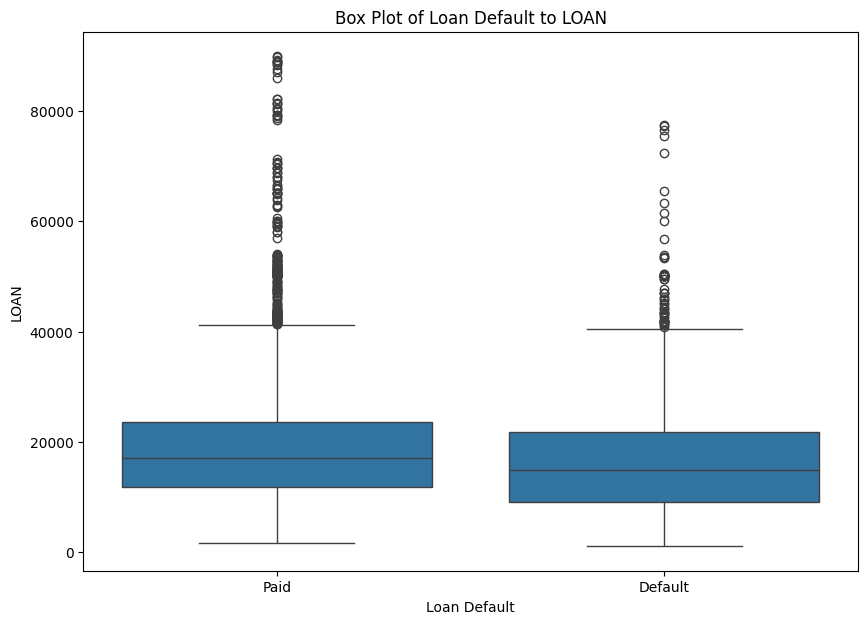

In [ ]:
bivariate_box_plot(data, 'LOAN')

**Observations**
- Most of the loans fall in a pretty tight region around $20k.
- There are a large number of outliers in both the paid and default cases making the data positively skewed.
- There is no major insight with loan amount size since those that defaulted tended to have smaller loans than those that paid them off. So there weren't any noticable adverse effects of carrying a larger balance for most borrowers.

####**Mortgage Balance to Default**

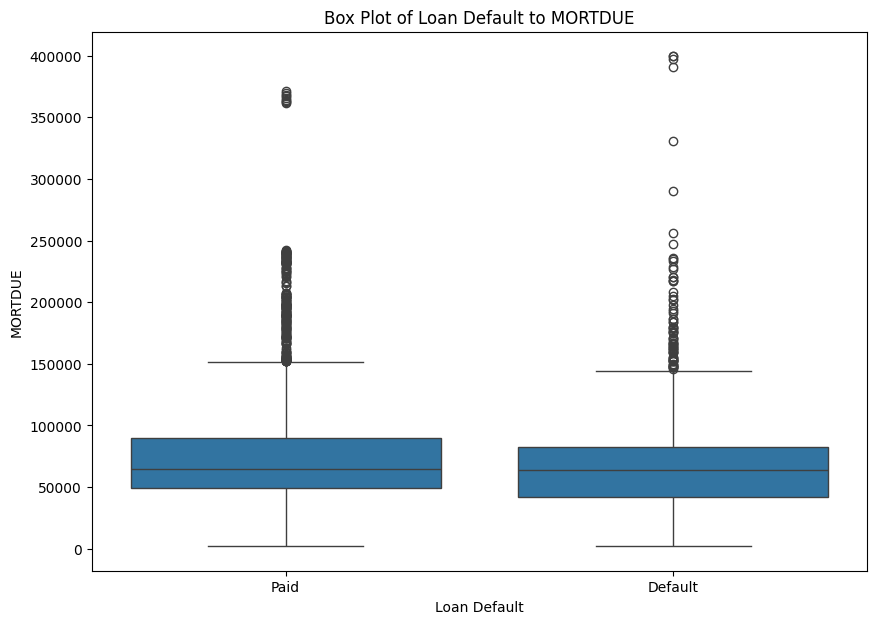

In [ ]:
bivariate_box_plot(data, 'MORTDUE')

**Observations**
- Similar to Loan amount, this shows the paid and default in fairly tight ranges but with a significant number of outliers.
- The medians between the paid and defaults are very close, so there is not a lot of correlation between mortgage due and defaults.
- The data is positively skewed.

####**Property Value to Default**

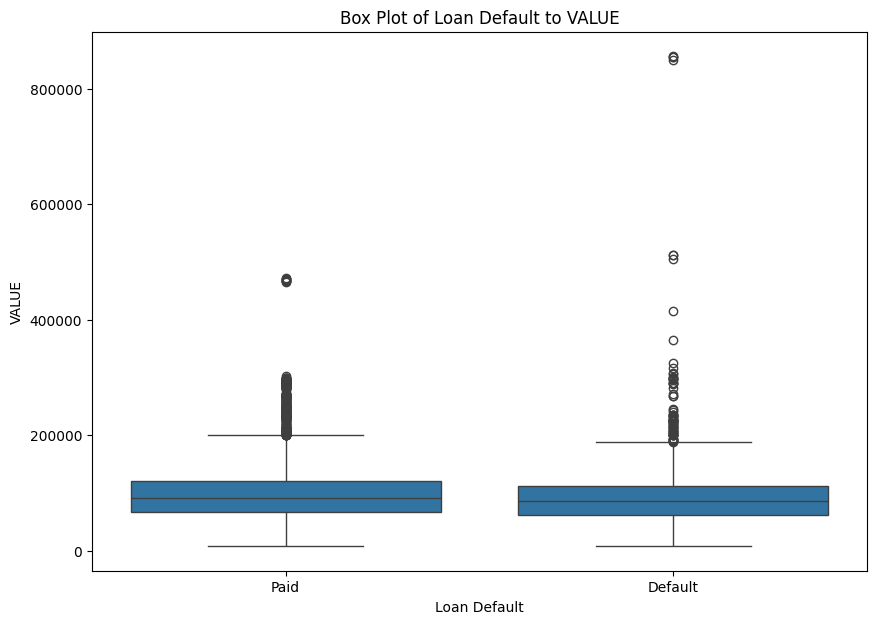

In [ ]:
bivariate_box_plot(data, 'VALUE')

**Observations**
- Not a lot of correlation between the value of the property and default risk, however, there are higher outliers on the default side which may bring a slightly higher correlation between higher loan amounts and default, but not much.
- The data is positively skewed but the medians are still very close, indicating little correlation between value and default risk.

####**Reason for Loan Request to Default**

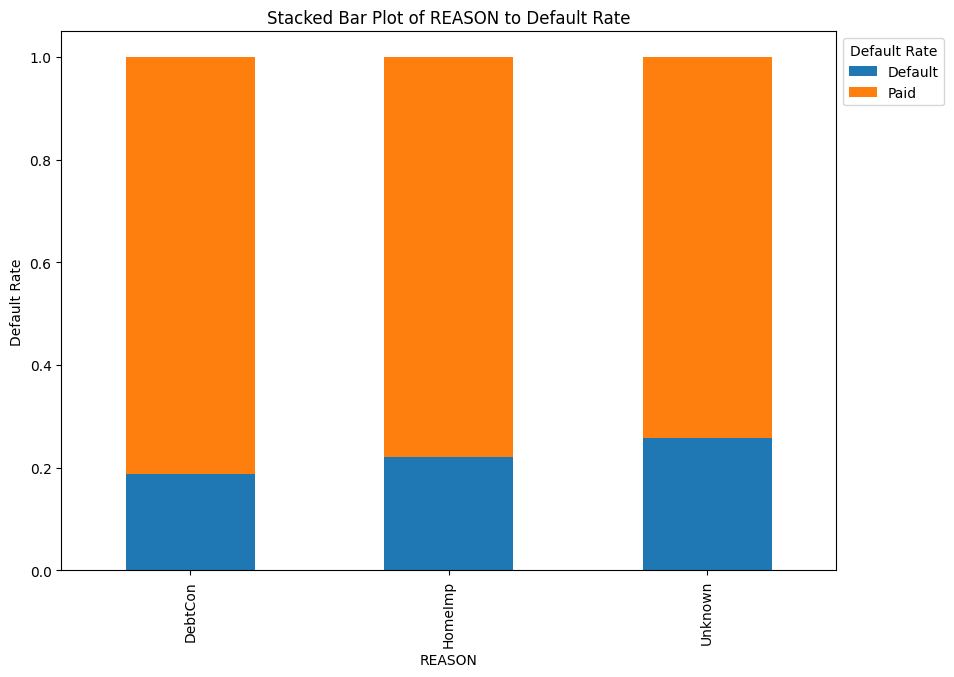

In [ ]:
stacked_barplot(data, 'REASON')

**Observations**
- Since the percentages among the three groups are similar, there isn't statistically meaningful information between any of these reasons and the default rate.
- Unknown serves as the placeholder for values that were misisng from the orginal set, so that one may fall in either of the other two and accounts for a small minority of total dataset.

####**JOB Type to Default**

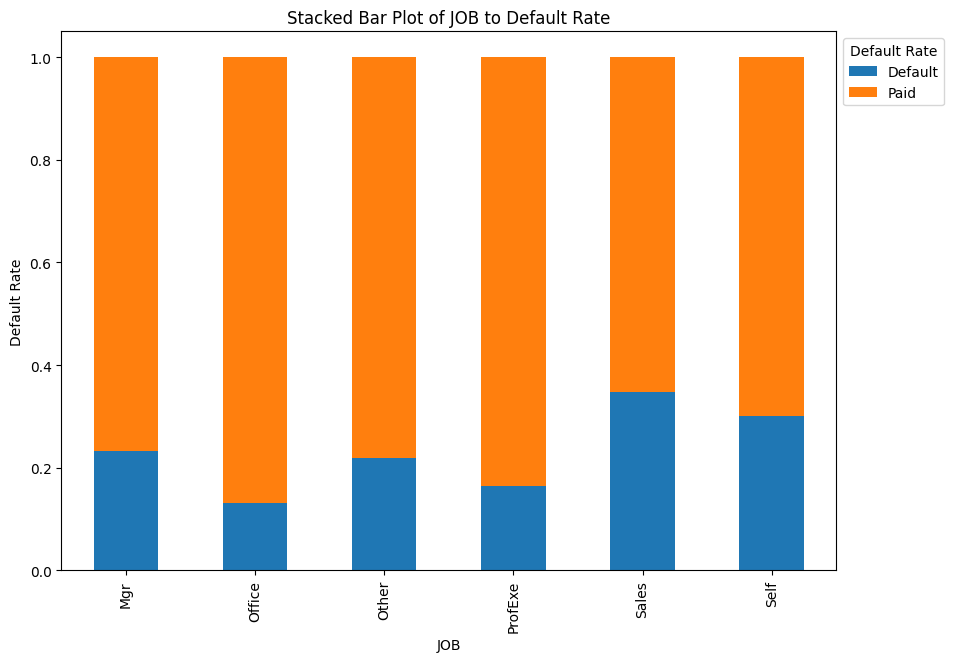

In [ ]:
stacked_barplot(data, 'JOB')

**Observations**
- There is more variation with this column, sales and self employed borrowers have higher default rates than the rest mainly due to the variability of those incomes. However, Office and Professional Executive have the lowest, owing to their potential higher earning abilities and more stability.
- As noted previously, these job types are very broad and therefore hard to make strong statements about each's economic status.

####**Years at Present Job to Default**

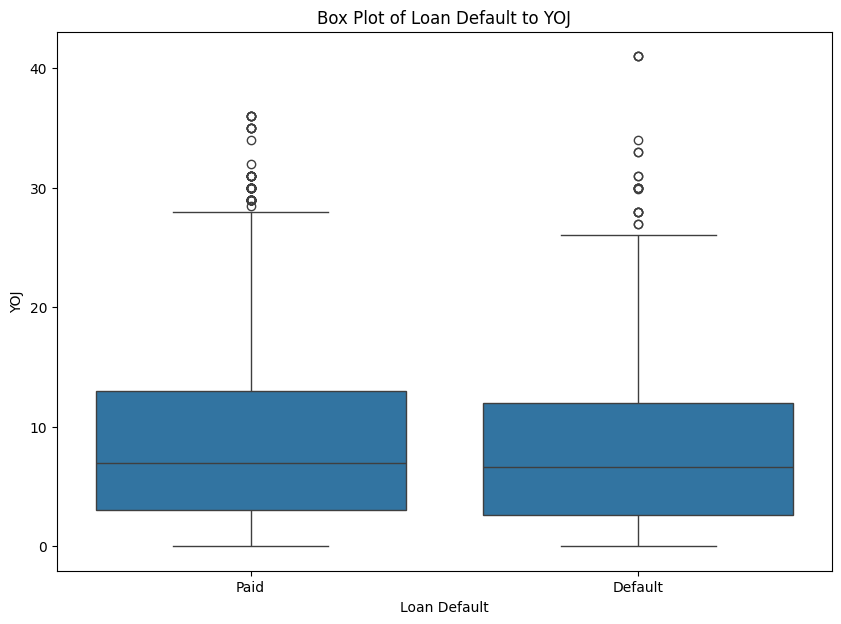

In [ ]:
bivariate_box_plot(data, 'YOJ')

**Observations**
- Not a lot of meaningful correlation with years on the job and default risk. Both have similar medians, ranges, and outliers.
- Each of these are positively skewed.

####**Number of Derogatory Reports to Default**

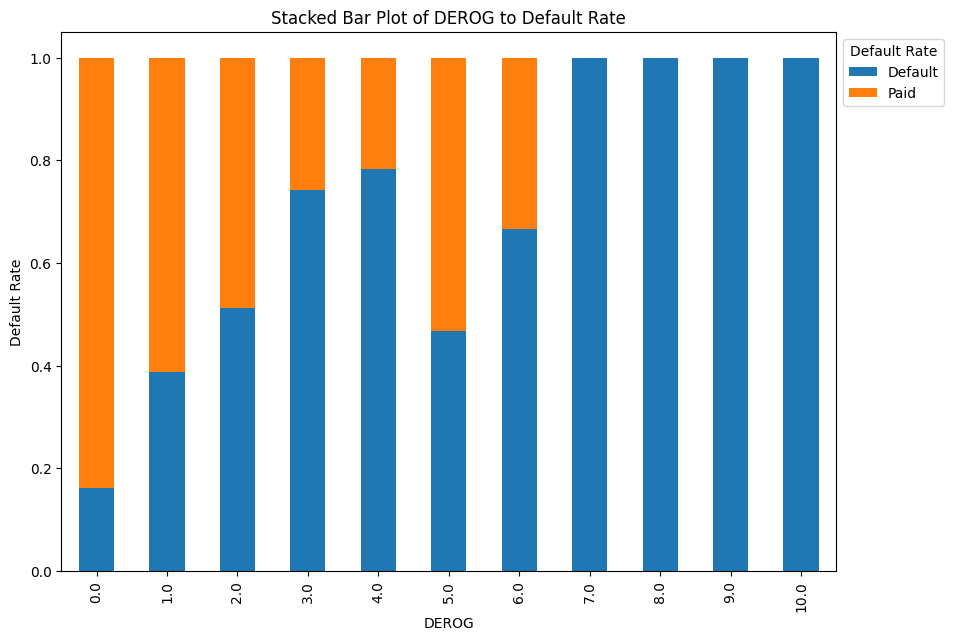

In [ ]:
stacked_barplot(data, 'DEROG')

**Observations**
- Understandably, as the number of derogatory reports increases, the likelihood of default rises significantly.
- The increase is fairly steep, suggesting a stronger correlation with default.
- The key to reducing defaults is to minimize derogatories, but there are likely latent features at play for those unable to make payments like job loss, unexpected financial hardship, etc that are not captured by this dataset.
- Above 6 derogatories, all borrowers default which indicates a significant elbow or inflection point.

####**Delinquent Credit Lines to Default**

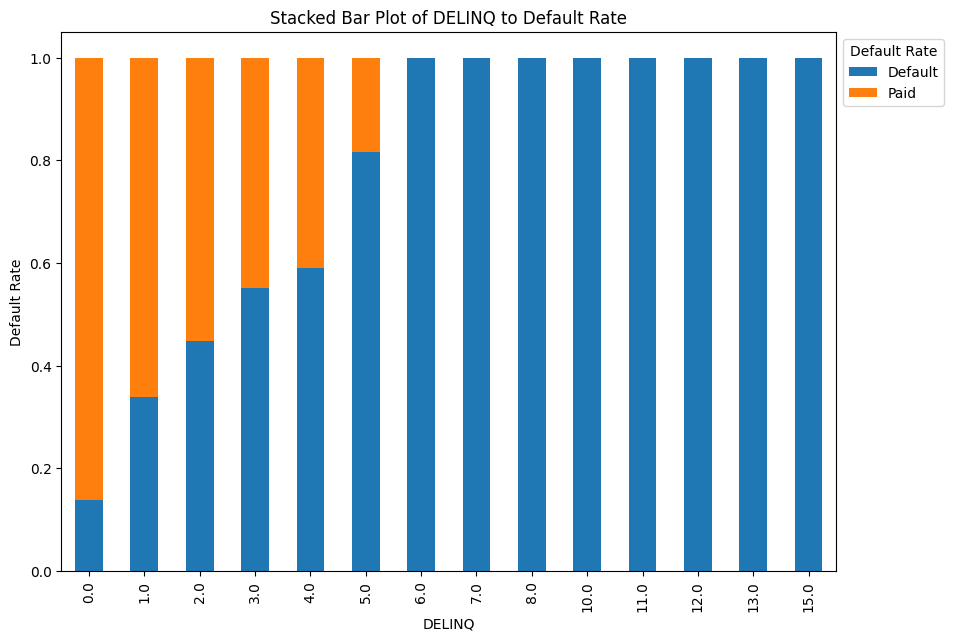

In [ ]:
stacked_barplot(data, 'DELINQ')

**Observations**
- Similar to the derogatories, the default rates increase with higher numbers of delinquent credit lines.
- The inflection point is at 6 bad lines, at which all borrowers default on their loans.
- The rate of increase is a steep slope, so this suggests there is a strong correlation with defaults.
- The key is keep the number of delinquent credit lines below 6 to increase probability of paying off loans.

####**Oldest Credit Line Age to Default**

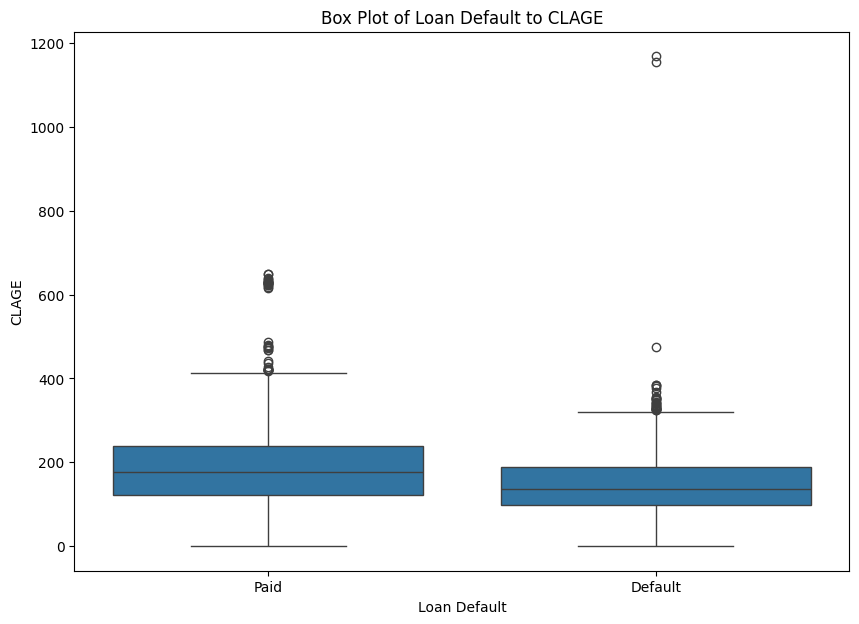

In [ ]:
bivariate_box_plot(data, 'CLAGE')

**Observations**
- There isn't a lot of correlation between the age of the oldest credit line and default rate.
- The medians and boxes are similar, with the main difference being the top outliers for defaults approaching 1200 months (1168 to be exact, that's over 97 years!), which interestingly defaulted.

####**Number of Inquiries to Default**

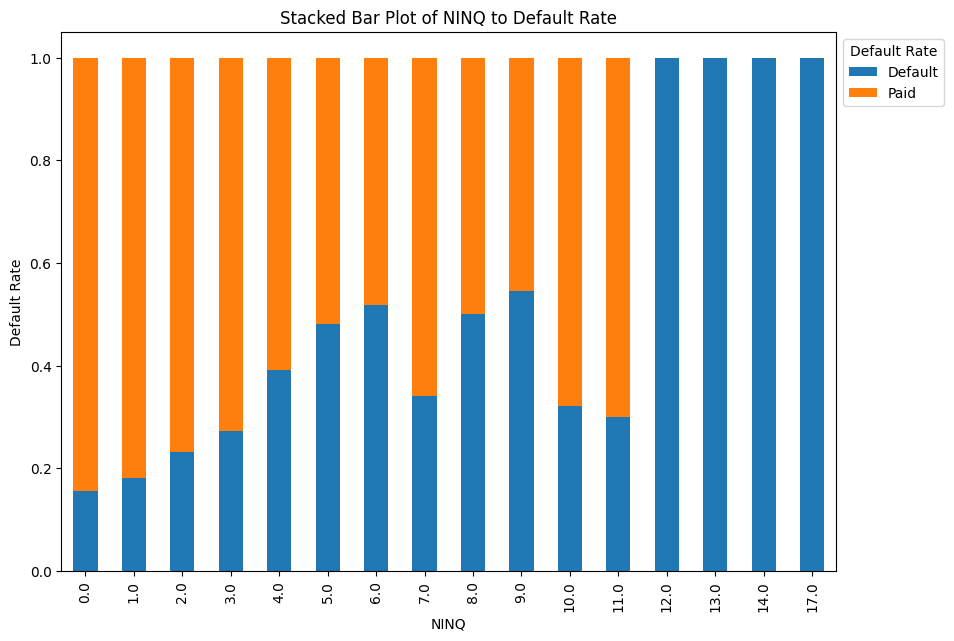

In [ ]:
stacked_barplot(data, 'NINQ')

**Observations**
- The increase of the number of inquiries to default is a lower slope (slower increase) than that of derogs and delinqs, but there is still a correlation between the two.
- Interestingly, after 11, all borrowers default, so this is the elbow of note and we should target keeping borrowers below this level to prevent them from defaulting.

####**Number of Existing Credit Lines to Default**

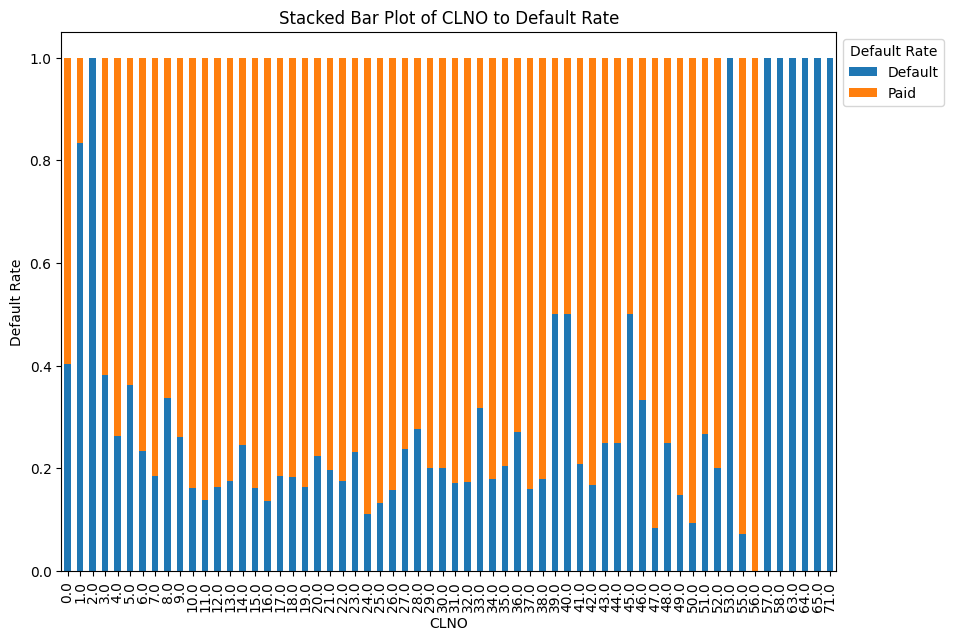

In [ ]:
stacked_barplot(data, 'CLNO')

**Observations**
- Besides a few extreme cases like 1, 2, 39, 40, and 53 lines with high or 100% default rates, the percantage is fairly uniform up until 57, after which 100% default.
- The distribution indicates there is a loose correlation between lines and defaults which is understandable since more lines of credit increases risk of default.

####**Debt to Income to Default**

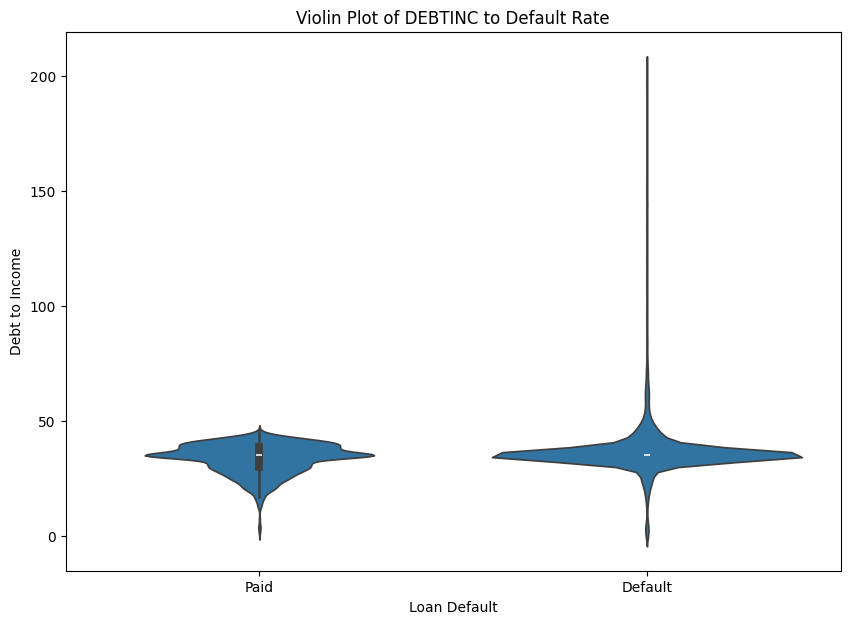

In [ ]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='BAD', y='DEBTINC', data=data)
plt.title(f'Violin Plot of DEBTINC to Default Rate')
plt.xlabel('Loan Default')
plt.ylabel('Debt to Income')

# Modify x-axis labels
ax = plt.gca()
ax.set_xticklabels(['Paid', 'Default'])
plt.show()

**Observations**
- Outside of the positive outliers for defaults, the distributions are similar, with similar medians and minimums.
- I used a voilin here to depict the concentrations in more detail.
- The concentration of defaults around the median are actually higher and tighter than that for the paid borrowers.
- Interestingly, since there is definitely a strong correlation between debt to income and default risk, in the lower end of the spectrum below 50 there isn't much differentiation between paid and default. However, if a borrower moves just above 50, all of them default. Therefore, ensuring borrowers stay below this level is key to paying off the loan.

### **Multivariate Analysis**

####**Correlation Matrix**

<Axes: >

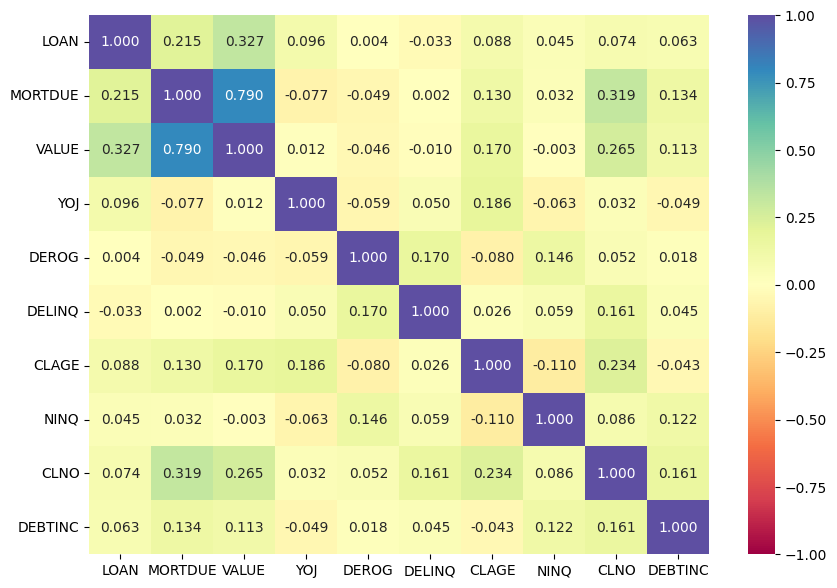

In [ ]:
# Finding the correlation between various numerical columns of the dataset
plt.figure(figsize = (10,7))
# Drop non numeric columns
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".3f", cmap = "Spectral")

**Observations**
- The most positive correlation is between home value and mortgage due, which makes sense because it likely takes a higher loan to pay for a house that has a higher value.
- The next most positive correlation (admittedly a lot lower than the last) is home value to the original loan amount, which also makes sense for the same reason as the home value to mortgage due.
- The last one of note (albeit with a low positive correlation) is the number of credit lines to the mortgage due amount, which might suggest that the higher the outstanding balance, the more unaffordable the mortgage is and therefore the borrower needs to open more credit lines in order to pay for goods and services.
- No features have a high negative correlation so are mostly uncorrelated.

####**PCA**

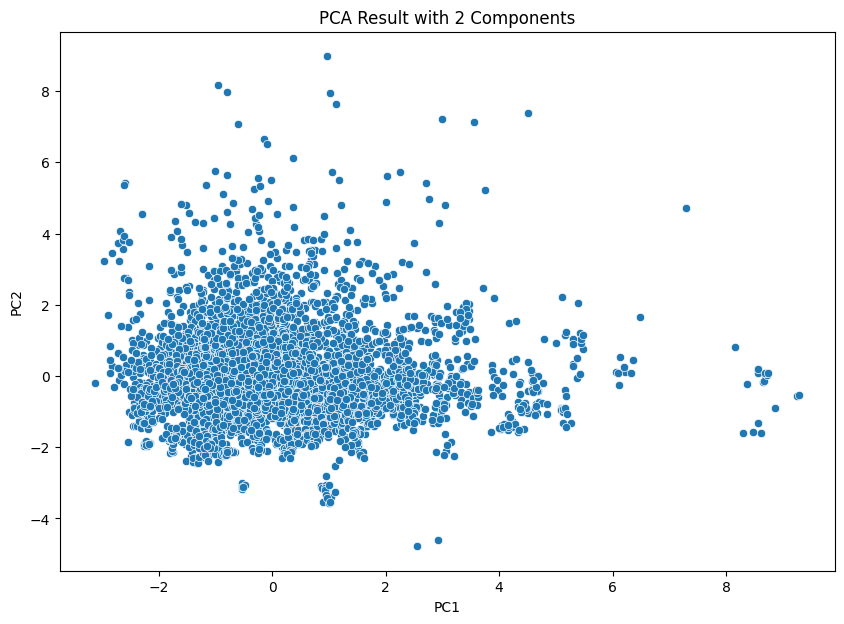

Explained variance by component: [0.22219448 0.13974052]
Total explained variance: 0.3619350013655498


In [ ]:
# One-hot encode categorical variables
data_pca = data.drop(columns=['BAD'])
data_pca = pd.get_dummies(data_pca, columns=['REASON', 'JOB'])

# Standardize the numerical features
scaler = StandardScaler()
numerical_features = data_pca.select_dtypes(include=[np.number]).columns
data_pca[numerical_features] = scaler.fit_transform(data_pca[numerical_features])

# Applying PCA
pca = PCA(n_components=2)  # Keeping 2 principal components
principal_components = pca.fit_transform(data_pca[numerical_features])

# Creating a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotting the PCA result
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Result with 2 Components')
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by component: {explained_variance}')
print(f'Total explained variance: {sum(explained_variance)}')

**Observations**
- A large mass of points is not providing much insight into different classes or separations in the data. I tried this with 3 components and got a similar graph.
- I will stick to using the correlation matrix results for the multivariate analysis but thought I would leave this in for reference.

## **Important Insights from EDA**

- Job type has a correlation to default risk, with sales and self employed borrowers having higher rates of default due to the inherent instability of these roles.
- The number of derogatory reports and delinquent credit lines have a similar impact on default risk, the slope of the line increases steeply to an inflection point, after which all borrowers default.
- There is a smaller correlation between inquiries and default, but the increased risk is a much shallower slope. However, after 11 inquiries, all borrowers default, so it's key to keeping that number lower than that.
- The debt to income ratio has a strong correlation to default risk above 50, which is understandable since those that take on more debt have a harder time paying it back.
- The most positive correlation between indepedent features is home value to mortgage due, which makes sense since a higher value typically means a higher mortgage balance.

##**Model Performance Evaluation**

In [92]:
# Function to compute different metrics to check performance of the classification models
def model_performance_classification(model, x_test, y_test, name='test', optimal_threshold=None):
  """
  Function to compute different metrics to check classification model performance

  model: classifier
  x_test: independent variables
  y_test: dependent variable
  """

  y_pred_proba = model.predict(x_test) # Predict using the independent variables

  # convert to binary if needed
  if name=='Logistic Regression':
    y_pred = (y_scores >= optimal_threshold).astype(int)
  else:
    y_pred = (y_pred_proba > 0.5).astype(int)

  accuracy = accuracy_score(y_test, y_pred)
  print(f'{name} Accuracy: {accuracy}')
  print('Classification Report:')
  print(classification_report(y_test, y_pred))

  # Generate the classification report as a dictionary
  report_dict = classification_report(y_test, y_pred, output_dict=True)

  new_report_dict = {
    'name': name,
    'precision': report_dict['1']['precision'],
    'recall': report_dict['1']['recall'],
    'f1-score': report_dict['1']['f1-score'],
    'accuracy': report_dict['accuracy']
  }

  # Convert the report to a DataFrame
  report_df = pd.DataFrame(new_report_dict, index=[0])

  cm = confusion_matrix(y_test, y_pred)

  # Create a heatmap to visualize the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Predicted Negative', 'Predicted Positive'],
              yticklabels=['Actual Negative', 'Actual Positive'])

  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

  return report_df

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

###**Data Preprocessing and Outlier Treatment**
- I have chosen to encode the categorical columns, impute missing values (done previously before EDA), and remove outliers with the z-score method before splitting the data into train and test sets.
- I have separated into clean (outliers removed) and raw data sets since some algos like logistic regression don't do well with outliers while the others do.

In [ ]:
# one hot encoding of REASON and JOB for raw data used
data_raw_encoded = pd.get_dummies(data, columns=['REASON', 'JOB'], drop_first=True)

# Identify and remove outliers using Z-score method if a feature has a score greater than 3
z_scores = np.abs(stats.zscore(data_raw_encoded[numerical_columns]))
data_clean_encoded = data_raw_encoded[(z_scores <= 3).all(axis=1)]
print(f'Cleaned dataset: {data_clean_encoded.shape}')
print('-'*50)
print(f'Raw dataset: {data_raw_encoded.shape}')
print('-'*50)
print(f'Outliers removed: {data_raw_encoded.shape[0] - data_clean_encoded.shape[0]}')

# split x and y from cleaned dataset to be used with logistic regression and ANN
x_clean = data_clean_encoded.drop(columns=['BAD'])
y_clean = data_clean_encoded['BAD']
x_clean_train, x_clean_test, y_clean_train, y_clean_test = train_test_split(x_clean, y_clean, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
x_clean_train_scaled = scaler.fit_transform(x_clean_train) # end output for algos
x_clean_test_scaled = scaler.transform(x_clean_test) # end output for algos

# split x and y from raw dataset to be used for all tree algos
x_raw = data_raw_encoded.drop(columns=['BAD'])
y_raw = data_raw_encoded['BAD']
x_raw_train, x_raw_test, y_raw_train, y_raw_test = train_test_split(x_raw, y_raw, test_size=0.2, random_state=42)

# Standardize the numerical features
x_raw_train_scaled = scaler.fit_transform(x_raw_train) # end output for algos
x_raw_test_scaled = scaler.transform(x_raw_test) # end output for algos

Cleaned dataset: (5144, 18)
--------------------------------------------------
Raw dataset: (5859, 18)
--------------------------------------------------
Outliers removed: 715


### Logistic Regression

test Accuracy: 0.8406219630709426
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       838
           1       0.74      0.22      0.34       191

    accuracy                           0.84      1029
   macro avg       0.79      0.60      0.62      1029
weighted avg       0.83      0.84      0.80      1029



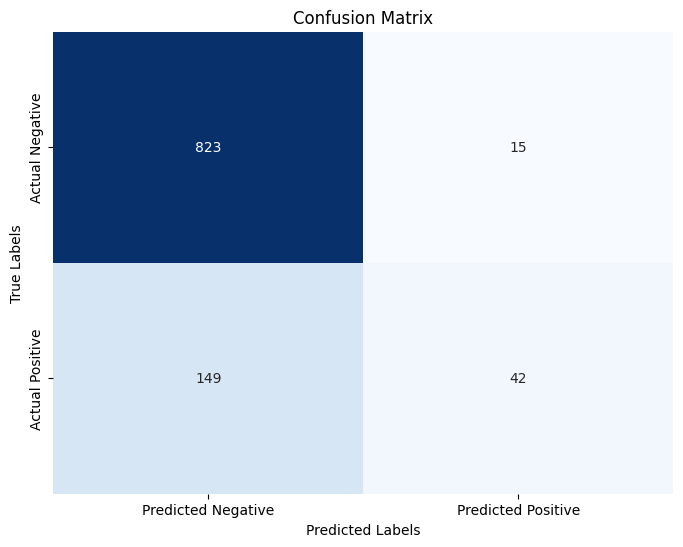

In [103]:
# Define the logistic regression model with default settings
log_reg_basic = LogisticRegression(random_state = 42)

# Train the model
log_reg_basic.fit(x_clean_train_scaled, y_clean_train)

# Evaluate Performance
log_regression_report = model_performance_classification(log_reg_basic, x_clean_test_scaled, y_clean_test)

####**Logistic Regression - Hyperparameter Tuning**

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


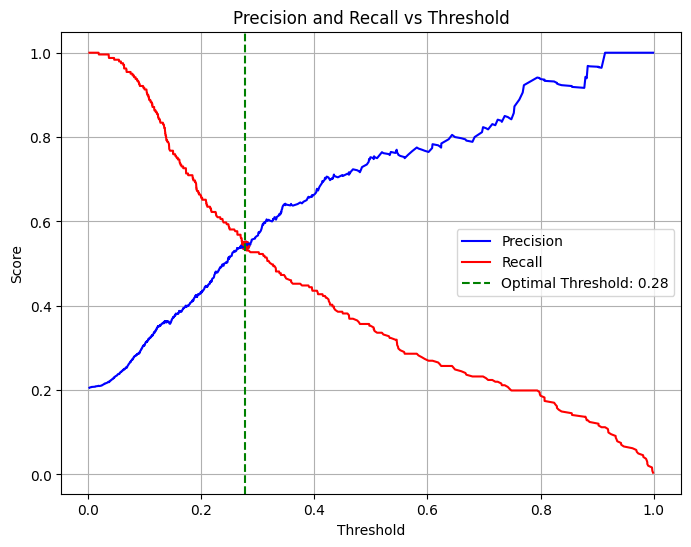

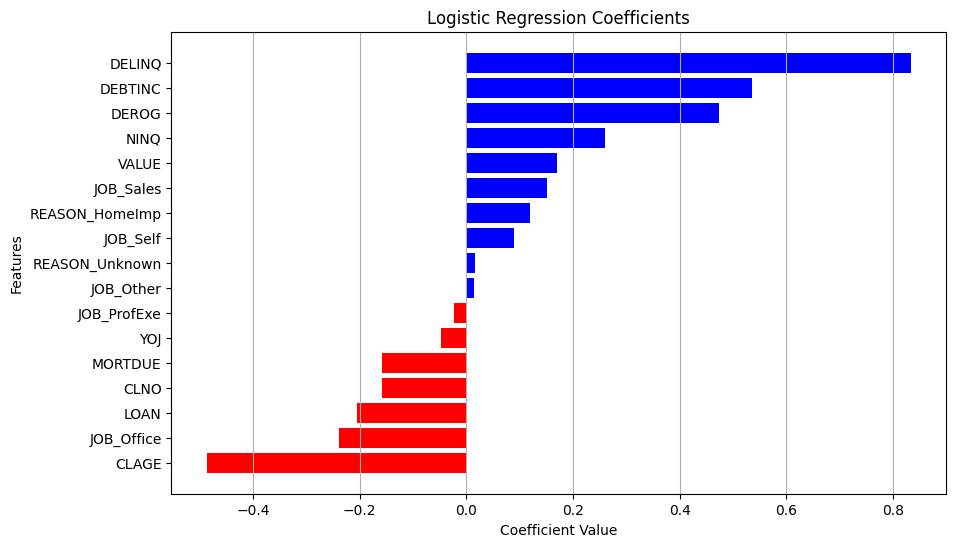

Logistic Regression Accuracy: 0.8122866894197952
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       931
           1       0.54      0.54      0.54       241

    accuracy                           0.81      1172
   macro avg       0.71      0.71      0.71      1172
weighted avg       0.81      0.81      0.81      1172



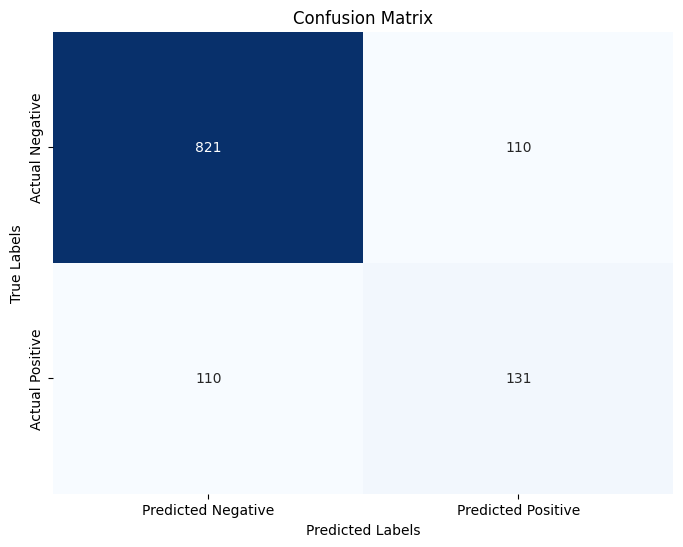

In [104]:
# Logistic Regression Classifier
log_reg = LogisticRegression(random_state = 42)

# Define the parameter grid for hyperparameter tuning
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['newton-cg', 'newton-cholesky', 'lbfgs', 'liblinear', 'sag', 'saga']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0, 0.5, 1]}
]

# Create a custom scorer for recall
recall_scorer = make_scorer(recall_score)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring=recall_scorer, n_jobs=-1)
grid_search.fit(x_raw_train_scaled, y_raw_train) # using the raw data yielded better results with outliers included

# Get the best parameters and train the logistic regression model
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

log_reg_best = grid_search.best_estimator_

# predict probabilities
y_scores = log_reg_best.predict_proba(x_raw_test_scaled)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_raw_test, y_scores)

# Find the threshold where precision and recall are closest
differences = np.abs(precision - recall)
optimal_idx = np.argmin(differences)
optimal_threshold = thresholds[optimal_idx]
optimal_precision = precision[optimal_idx]
optimal_recall = recall[optimal_idx]

# Plot precision and recall
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='red')
plt.scatter(optimal_threshold, optimal_precision, marker='o', color='blue')
plt.scatter(optimal_threshold, optimal_recall, marker='o', color='red')
plt.axvline(x=optimal_threshold, color='green', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

# Calculate and view coefficients
coefficients = log_reg_best.coef_[0]
features = x_clean.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort coefficients from the most positive to the most negative
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)

# Plotting the coefficients on a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=['blue' if x > 0 else 'red' for x in coef_df['Coefficient']])
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Logistic Regression Coefficients')
plt.grid(axis='x')
plt.show()

# Evaluate Performance
log_regression_best_report = model_performance_classification(log_reg_best, x_raw_test_scaled, y_raw_test, 'Logistic Regression', optimal_threshold=optimal_threshold)

**Observations**
- As expected, the coefficients with the most impact on the target are the number of delinquent credit lines, the debt to income ratio, and the number of derogatory reports.
- The least impactful coefficents is the age of the oldest credit line, whether the person has an office job, and the amount of the loan. The last of which is a little surprising, since the amount of indebtedness usually has an effect on the repayment status of the loan.
- Finding the optimal precision-recall threshold combined with hyperparameter tuning yields vastly superior results to the base model. However, in its current state, at 54% recall the performance is still low and is therefore a weaker release candidate to operationalize. Additional tuning with this model may yield improved results.
- Note that I used the raw training data (which includes outliers) in the tuned model. I tested the tuned model with both raw and clean data and the raw data outperformed the clean data for recall by several percentage points so I stuck with that here.

###**Decision Tree**

test Accuracy: 0.8703071672354948
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       931
           1       0.70      0.65      0.67       241

    accuracy                           0.87      1172
   macro avg       0.80      0.79      0.80      1172
weighted avg       0.87      0.87      0.87      1172



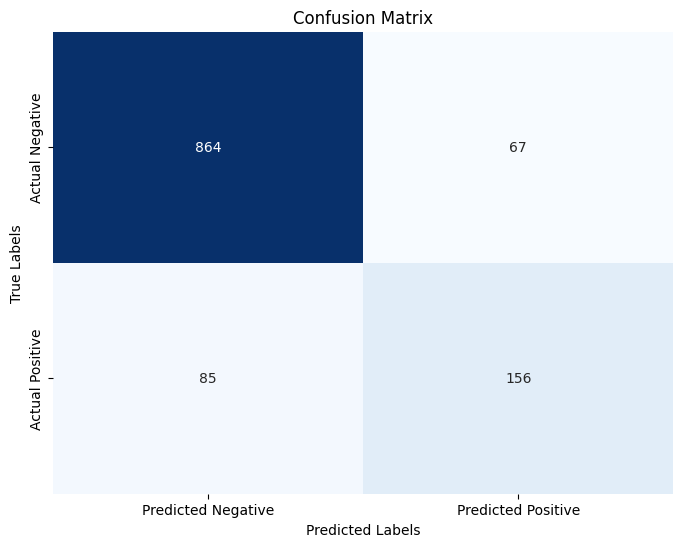

In [99]:
# Define the decision tree model with default settings
dt_basic = DecisionTreeClassifier(random_state = 42)

# Train the model
dt_basic.fit(x_raw_train_scaled, y_raw_train)

# Performance
dt_report = model_performance_classification(dt_basic, x_raw_test_scaled, y_raw_test)

#### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperparameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 0.8882252559726962
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       931
           1       0.78      0.64      0.70       241

    accuracy                           0.89      1172
   macro avg       0.84      0.80      0.82      1172
weighted avg       0.88      0.89      0.88      1172



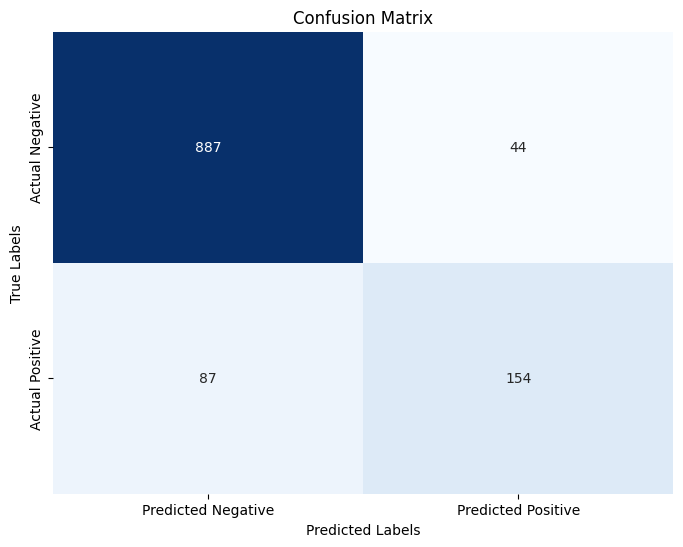

In [ ]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state = 42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 7, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Create a custom scorer for recall
recall_scorer = make_scorer(recall_score)

# Setup the gridsearch with tuning using f1 due to imbalanced target classes
dt_grid = GridSearchCV(dt_classifier, param_grid, scoring = recall_scorer, cv = 5, n_jobs=-1)

# train using the raw data without removing the outliers bc tree algos work fine with them
dt_grid = dt_grid.fit(x_raw_train_scaled, y_raw_train)

# print the best params
best_params = dt_grid.best_params_
print(f'Best Parameters: {best_params}')

# Set the dt_tuned_classifier to the best combination of parameters
dt_best_classifier = dt_grid.best_estimator_

# Model Performance on the test data
dt_best_report = model_performance_classification(dt_best_classifier, x_raw_test_scaled, y_raw_test, 'Decision Tree')

**Observations**
- Interestingly, the tuned DT model faired slightly worse for recall then the base model, but was better in all other metrics, making it arguably the slightly stronger model overall. I would argue that more tuning would result in a superior model, however it would likely be an incremental improvement.

###**Random Forest**

test Accuracy: 0.8250853242320819
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       931
           1       0.81      0.20      0.31       241

    accuracy                           0.83      1172
   macro avg       0.82      0.59      0.61      1172
weighted avg       0.82      0.83      0.78      1172



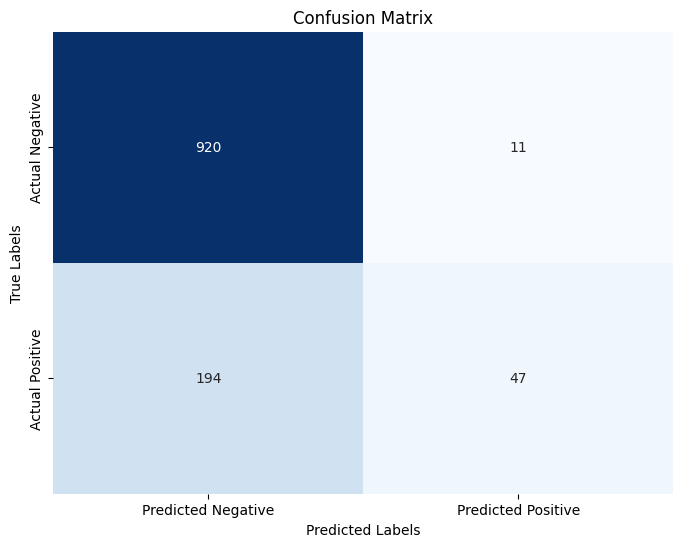

In [100]:
# Define the random forest model with default settings
rf_basic = RandomForestClassifier(random_state = 42)

# Train the model
rf_basic.fit(x_clean_train_scaled, y_clean_train)

# Performance
rf_report = model_performance_classification(rf_basic, x_raw_test_scaled, y_raw_test)

####**Random Forest Classifier - Hyperparameter Tuning**
**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

Best Parameters: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.8993174061433447
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       931
           1       0.72      0.83      0.77       241

    accuracy                           0.90      1172
   macro avg       0.84      0.88      0.85      1172
weighted avg       0.91      0.90      0.90      1172



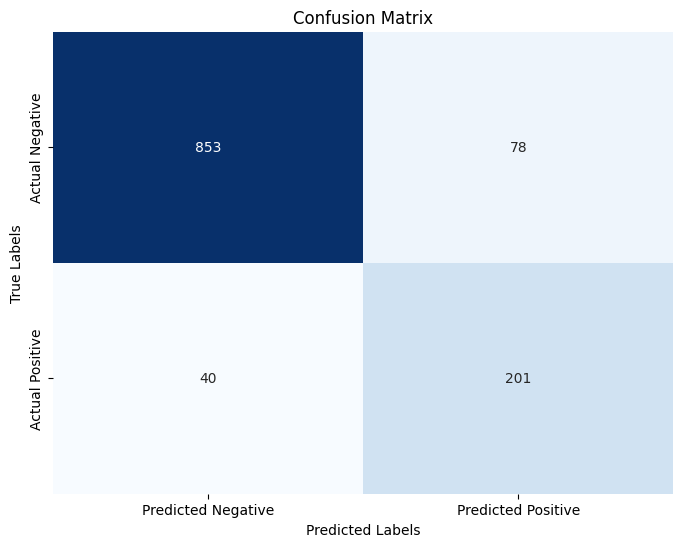

In [ ]:
rf_classifier = RandomForestClassifier(random_state = 42)

# Grid of parameters to choose from
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 20],
    'min_samples_leaf': [1, 10, 15],
    'bootstrap': [False],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Create a custom scorer for recall
recall_scorer = make_scorer(recall_score)

# Setup the gridsearch with tuning using f1 due to imbalanced target classes
rf_grid = GridSearchCV(rf_classifier, param_grid, scoring = recall_scorer, cv = 5, n_jobs=-1)

# train using the raw data without removing the outliers bc tree algos work fine with them
rf_grid = rf_grid.fit(x_raw_train_scaled, y_raw_train)

# print the best params
best_params = rf_grid.best_params_
print(f'Best Parameters: {best_params}')

# Set the rf_tuned_classifier to the best combination of parameters
rf_best_classifier = rf_grid.best_estimator_

# Model Performance on the test data
rf_best_report = model_performance_classification(rf_best_classifier, x_raw_test_scaled, y_raw_test, 'Random Forest')

**Observations**
- The base Random Forest model did poorly in recall (20%) but the tuned model was far superior (83%).
- I spent more than 18 hours through several iterations training various parameters and winnowing them down to achieve these results.

###**ANN Classifier Hyperparameter Tuning**
I wanted to try a deep learning model for comparison purposes to see how a vanilla ANN would perform. I could tweak hyperparameters to achieve a better outcome in the future to see how good this option can be.

In [ ]:
# Define a custom recall metric
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

Epoch 1/100
317/330 [===========================>..] - ETA: 0s - loss: 0.4701 - accuracy: 0.7909 - recall_m: 0.0856
Epoch 1: val_recall_m improved from -inf to 0.08735, saving model to best_model.h5
330/330 [==============================] - 2s 4ms/step - loss: 0.4680 - accuracy: 0.7922 - recall_m: 0.0843 - val_loss: 0.3596 - val_accuracy: 0.8627 - val_recall_m: 0.0873
Epoch 2/100
318/330 [===========================>..] - ETA: 0s - loss: 0.3697 - accuracy: 0.8475 - recall_m: 0.1402
Epoch 2: val_recall_m improved from 0.08735 to 0.18173, saving model to best_model.h5
330/330 [==============================] - 1s 4ms/step - loss: 0.3724 - accuracy: 0.8454 - recall_m: 0.1396 - val_loss: 0.3406 - val_accuracy: 0.8566 - val_recall_m: 0.1817
Epoch 3/100
320/330 [============================>.] - ETA: 0s - loss: 0.3532 - accuracy: 0.8525 - recall_m: 0.2141
Epoch 3: val_recall_m improved from 0.18173 to 0.26707, saving model to best_model.h5
330/330 [==============================] - 1s 4ms/s

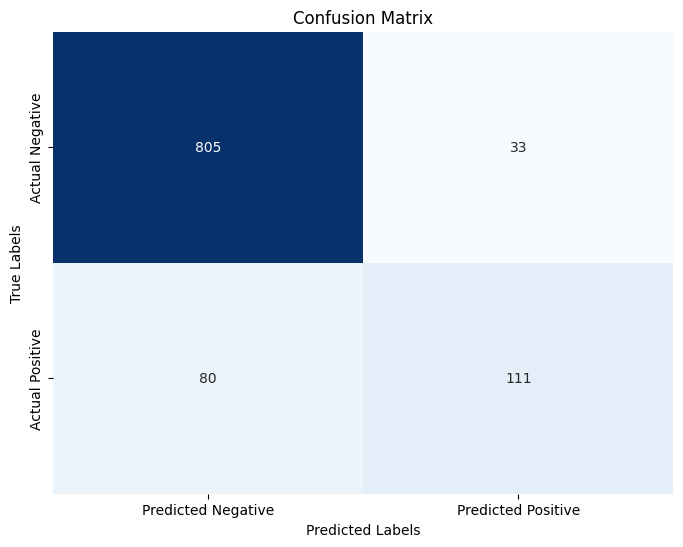

In [ ]:
# Build the ANN model
ann_model = Sequential()
ann_model.add(Dense(32, input_dim=x_clean_train_scaled.shape[1], activation='relu'))  # First hidden layer with 32 units
ann_model.add(Dense(16, activation='relu'))  # Second hidden layer with 16 units
ann_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',recall_m])

# stops training early if there is no additional improvement
# es = EarlyStopping(monitor = 'val_recall_m', mode = 'max', verbose = 1, patience = 15)

# Saves the best model's parameters if training accuracy goes down on further training
mc = ModelCheckpoint('best_model.h5', monitor = 'val_recall_m', mode = 'max', verbose = 1, save_best_only = True)

# Train the model
ann_model.fit(x_clean_train_scaled, y_clean_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2, callbacks = [mc])

# Model performance on the test data
ann_report = model_performance_classification(ann_model, x_clean_test_scaled, y_clean_test, 'Artificial Neural Network')

**Observations**
- I trained and tuned the ANN several times to optimize on recall, and I believe 58% is the best I will achieve given this network design.
- Perhaps changing the architecture by adding a layer or further tuning may improve performance.
- I will spend more time in the future training an ANN with different architectures which may yield better results.

###**XGBoost**

test Accuracy: 0.9274744027303754
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       931
           1       0.91      0.72      0.80       241

    accuracy                           0.93      1172
   macro avg       0.92      0.85      0.88      1172
weighted avg       0.93      0.93      0.92      1172



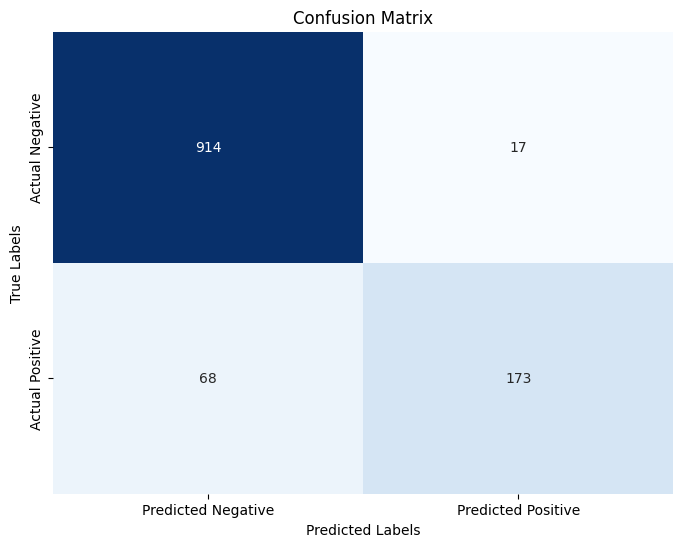

In [101]:
# XGBoost Classifier
xgb_basic = XGBClassifier(use_label_encoder=False, eval_metric=recall_score, random_state=42)

# Fit to the data
xgb_basic.fit(x_raw_train_scaled, y_raw_train)

# Model performance on the test data
xgb_report = model_performance_classification(xgb_basic, x_raw_test_scaled, y_raw_test)

####**XGBoost - Hyperparameter Tuning**

Best Parameters: {'colsample_bytree': 0.9416401294594341, 'learning_rate': 0.10406005609152943, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9534142207728771}
XGBoost Accuracy: 0.9274744027303754
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       931
           1       0.91      0.72      0.80       241

    accuracy                           0.93      1172
   macro avg       0.92      0.85      0.88      1172
weighted avg       0.93      0.93      0.92      1172



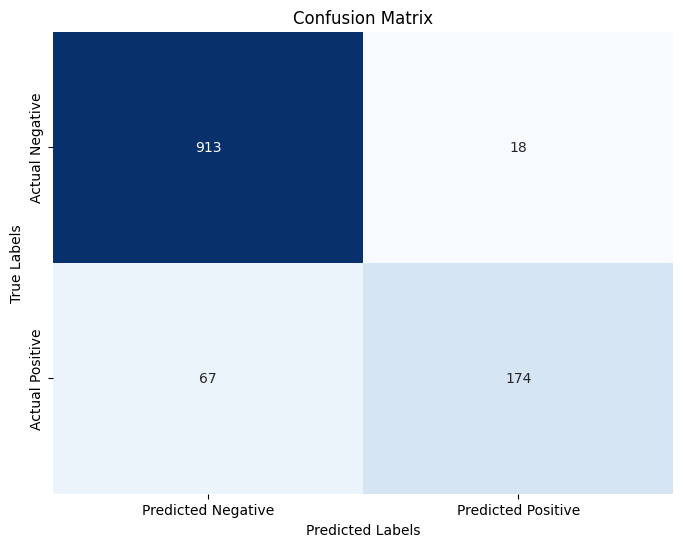

In [81]:
# XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric=recall_score, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': uniform(0.01, 0.29),  # Range 0.01 to 0.3
    'subsample': uniform(0.5, 0.5),  # Range 0.5 to 1
    'colsample_bytree': uniform(0.5, 0.5),  # Range 0.5 to 1
    'min_child_weight': [1, 2, 3, 4, 5]
}

# Create a custom scorer for recall
recall_scorer = make_scorer(recall_score)

xgb_grid = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid,
                              n_iter=200, cv=5, scoring=recall_scorer, random_state=42, n_jobs=-1)

# Fit the GridSearchCV to the data
xgb_grid.fit(x_raw_train_scaled, y_raw_train)

# print the best params
best_params = xgb_grid.best_params_
print(f'Best Parameters: {best_params}')

xgb_best_classifier = xgb_grid.best_estimator_

xgb_best_report = model_performance_classification(xgb_best_classifier, x_raw_test_scaled, y_raw_test, 'XGBoost')

**Observations**
- The tuned XGBoost model didn't improve recall from the base model.
- However, the relatively quick training times make this a valuable algorithm to use to apply for any problem of this nature.

###**Model Comparison and Summary**

In [102]:
summary = pd.concat([log_regression_best_report, dt_best_report, rf_best_report, ann_report, xgb_best_report],
          axis=0, ignore_index=True)
summary

,name,precision,recall,f1-score,accuracy
0,Logistic Regression,0.54357,0.54357,0.54357,0.81229
1,Decision Tree,0.77778,0.63900,0.70159,0.88823
2,Random Forest,0.72043,0.83402,0.77308,0.89932
3,Artificial Neural Network,0.77083,0.58115,0.66269,0.89018
4,XGBoost,0.90625,0.72199,0.80370,0.92747


**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- The most important metric to look at for this problem is the recall for the default class (BAD==1). Recall represents a complete loss for the bank, and encompasses all the loans the model thought would be paid but in fact were defaulted on (false negatives).
- Precision is defined by the model as the false positives, or those that were predicted to default but actually paid in full. This category of outcomes still represents an opportunity cost for the bank, but is much lower in magnitude than the near total loss for the recall or false negative case.
- After tuning the models to optimize for recall, the best performance for the hyperparameters tested is the Random Forest Classifier. It must be said, with the number of hyperparameters that were tuned for the Random Forest, the training took around 18 hours to complete. With that level of training, it's notable that a recall of 83.4% is a very strong result.
- XGBoost is a strong contender given that it took only a few minutes to yield a recall of 72.2%. However, after a lot of tuning, XGBoost doesn't seem to improve much over the range of parameters used.
- Interestingly, the ANN was considerably outperformed by the tuned Decision Tree, however, it should be noted that the ANN was a standard vanilla network with only a few manual iterations of tuning. I plan to spend more time tuning this and will likely make this a much stronger competitor. I wanted to include it here for context to see how it would compare.
- Lastly, the tuned Logistic Regression model is understandbly the worst performer, and likely not good enough to operationalize. It should be noted that I got better results using the raw data that included outliers versus the dataset that had them removed. That said, perhaps incremental gains might be found with additional tuning, but likely not enough to make this viable.

**2. Refined insights:**
- The recall performance is certainly of highest importance given this dataset, but it should be noted that random forest took a long time to train. I had a preliminary param_grid that took over an hour and achieve low 70% recall, but I added a larger number of hyperparameters and was able to achieve 83.4% as stated above. Logistic Regression was the quickest, but the performance of the predictions was the worst by a wide margin. From my previous elective project I had good success with using bagging, so I would explore that approach with this dataset and experiment more with tuning the ANN to see if either of those perform better than the random forest classifier.
- Regarding XGBoost, one or two of the hyperparameters were at the extreme edges of the given ranges and this could be further tuned in order to squeeze more from this method.
- In the future I will try tuning the ANN to see if a different network might yield better results and work with some visualization tools to improve explainability.

**3. Proposal for the final solution design:**
- Predictability versus explainability is always a key concern and is very domain specific. Since this is in finance, explainability is a higher priority than predictability so this lends itself to either logistic regression or decision tree, or perhaps a really well documented random forest.
- That said, if we can be looser on the requirements for explainability, I would say that Random Forest and XGBoost are great candidates given its performance and its relatively short training. In order to make a definitive decision, hyperparameter tuning on the ANN would need to be done and more exploration into ensemble techniques like bagging should be performed as well. Another interesting technique outside the scope of this project would be to apply an ensemble of heterogeneous models to see if that might improve performance.
- Given the results of Random Forest and XGBoost on the smaller dataset, I would conclude that it's a really useful model for predicting loan defaults but using a more robust dataset might favor the use of a more fine-tuned ANN.